# **1. Introduction**
## **1.1 Background**
Dataset ini digunakan untuk menganalisis bagaimana pelanggan berinteraksi dengan supermarket, baik dari sisi kebiasaan konsumsi maupun dari efektivitas strategi pemasaran yang diterapkan.

Sebuah perusahaan yang bergerak di bidang retail/penjualan barang, Pentingnya pemahaman mendalam tentang meningkatkan penjualan, membangun loyalitas, dan merancang kampanye pemasaran yang relevan. 

## **1.2 Pernyataan Masalah**
Supermarket menghadapi tantangan untuk memahami perilaku pelanggan secara mendalam agar dapat meningkatkan penjualan, membangun loyalitas, dan menjalankan kampanye yang efektif. Namun karena pelanggan memiliki beragam preferensi dan kebiasaan. Untuk itu sebagai data scientist

Bagaimana Karakteristik pelanggan ketika membeli suatu produk di supermarket, agar pemasaran efektif dan dapat meningkatkan penjualan serta membangun loyalitas dari pelanggan?


# **2. Data**

In [99]:
# import library
import numpy as np
import pandas as pd 

# import visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# menampilkan semua kolom
pd.set_option('display.max_columns', None)

# menghilangkan warning
import warnings
warnings.filterwarnings("ignore")

# import datelibrary
from datetime import datetime
from operator import attrgetter

In [100]:
df = pd.read_csv('supermarket_customers.csv', delimiter='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## **2.1 Data Understanding**

Dataset supermarket_customer ini merepresentasikan data pelanggan dalam sebuah supermarket. Setiap kolom-kolom dalam dataset ini berisi informasi tentang atribut pelanggan, karakteristik pembelian, serta response pelanggan terhadap kampanye pemasaran.

Berikut adalah penjelasan masing-masing kolom pada dataset supermarket_customers.csv

**Pelanggan:**
- **ID:** Kolom ID untuk setiap pelanggan (Categorical, Unique).
- **Year_Birth:** Tahun lahir pelanggan (Categorical).
- **Education:** Tingkat pendidikan terakhir pelanggan (Categorical).
- **Marital_Status:** Apakah pelanggan tersebut sudah menikah atau belum (Categorical).
- **Income:** Pendapatan per bulan (Numeric Kontinu).
- **Kidhome:** Jumlah anak dalam rumah tangga pelanggan (Numeric Diskrit)
- **Teenhome:** Jumlah remaja dalam rumah tangga pelanggan (Numeric Diskrit)

**Informasi Waktu dan Loyalitas:**
- **Dt_Customer:** Tanggal pelanggan pertama kali menjadi pelanggan di supermarket ini
- **Recency:** Jumlah hari sejak terakhir kali pelanggan melakukan pembelian

**Pengeluaran Pelanggan ($):**
- **MntWines:** Total pengeluaran untuk produk wine (anggur) dalam 2 tahun terakhir
- **MntFruits:** Total pengeluaran untuk produk buah dalam 2 tahun terakhir
- **MntMeatProducts:** Total pengeluaran untuk produk daging dalam 2 tahun terakhir
- **MntFishProducts:** Total pengeluaran untuk produk ikan dalam 2 tahun terakhir
- **MntSweetProducts:** Total pengeluaran untuk produk makanan manis dalam 2 tahun terakhir
- **MntGoldProds:** Total pengeluaran untuk produk (barang berharga) dalam 2 tahun terakhir

**Aktivitas Pembelian Pelanggan:** 
- **NumDealsPurchases:** Jumlah pembelian yang dilakukan dalam diskon
- **NumWebPurchases:** Jumlah pembelian yang dilakukan melalui website
- **NumCatalogPurchases:** Jumlah pembelian yang dilakukan melalui katalog
- **NumStorePurchases:** Jumlah pembelian yang dilakukan dengan langsung datang ke toko fisik
- **NumWebVisitsMonth:** Jumlah kunjungan pelanggan ke website dalam sebulan terakhir

**Respon Terhadap Kampanye Pemasaran:** 
- **AcceptedCmp1 - AcceptedCmp5:** Indikator (0/1) apakah pelanggan menerima dan merespon kampanye pemasaran tertentu.
- **Response:** Indikator apakah pelanggan merespon kampanye pemasaran terakhir.
- **Complain:** Indikator apakah pelanggan mengajukkan keluhan dalam 2 tahun terakhir.

**Informasi Tambahan:** 
- **Z_CostContact:** Biaya yang dikeluarkan per kontak (nilai tetap).
- **Z_Revenue:** Pendapatan yang dihasilkan dari setiap pelanggan (nilai tetap).

In [101]:
# Mengecek jumlah baris dan kolom pada dataset
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')

# Mengecek tipe data yang dipakai dari setiap kolom
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [102]:
# Mengecek tipe data unique dari kolom yang bertipe data object
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [103]:
pd.set_option('display.max_colwidth', 10000)

# data unit di tiap kolom
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

**Dari pengecekan data diatas, bisa disimpulkan bahwa:** 
- Dataset supermarket_customers memiliki 29 kolom dan 2240 baris.
- Kolom `Income` memiliki data kosong sekitar 1.07%. Data kosong diwakili dengan data NaN.
- Kolom `ID` berisikan id unik untuk setiap customer. Karena tidak ada kolom nama di dataset ini, maka kolom `ID` bisa dijadikan categorical nominal dan diubah ke tipe data object.
- Kolom `Marital_Status` masih anomali datanya, sehingga perlu di cleaning.
- Kolom Z_CostContact dan Z_Revenue dalam dataset ini bersifat administratif atau teknis.daripada relevan dengan analisis perilaku pelanggan dan loyalitas. Dan kolom ini bernilai tetap (konstan), sehingga dihapus saja.
- Karena tidak ada kolom age, nanti akan dibuat kolom `Age` dari kolom `Year_Birth` untuk melakukan categorical umur.

**Missing Value**

In [104]:
# Persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

<Axes: >

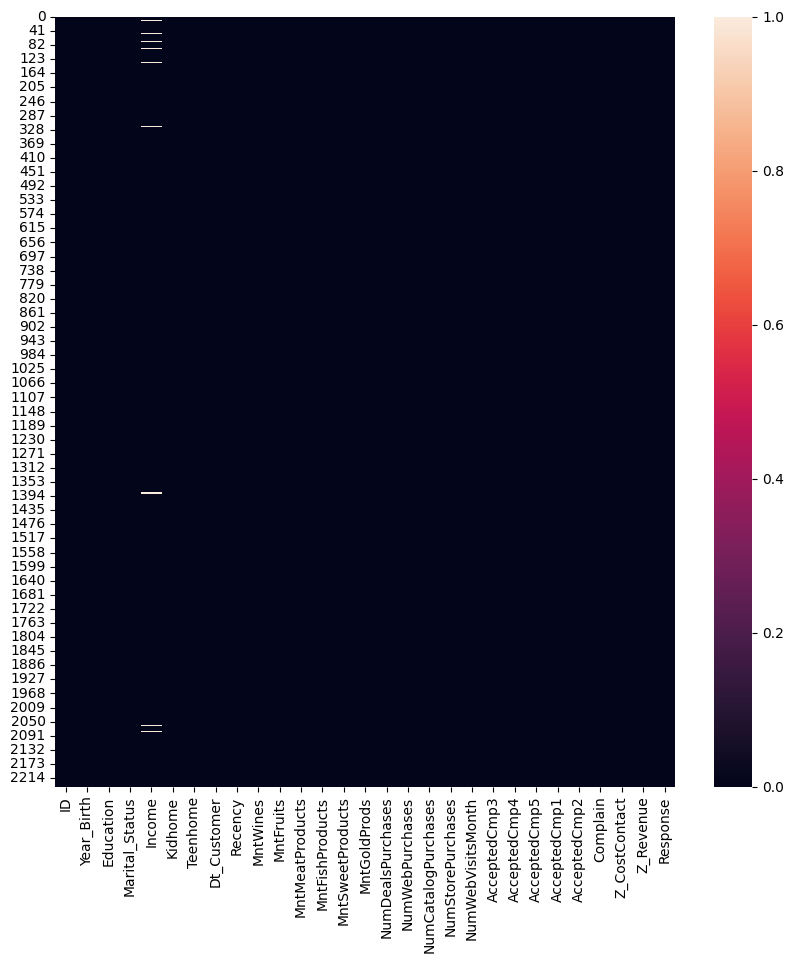

In [105]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[df.columns].isna())

- Missing value di kolom `Income` memiliki proporsi yang sangat rendah, yaitu 1.07%
- Cara untuk menangani missing value ialah bisa dihapus saja.

## **2.2 Data Cleaning**

In [106]:
df.dropna(inplace=True)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

<Axes: >

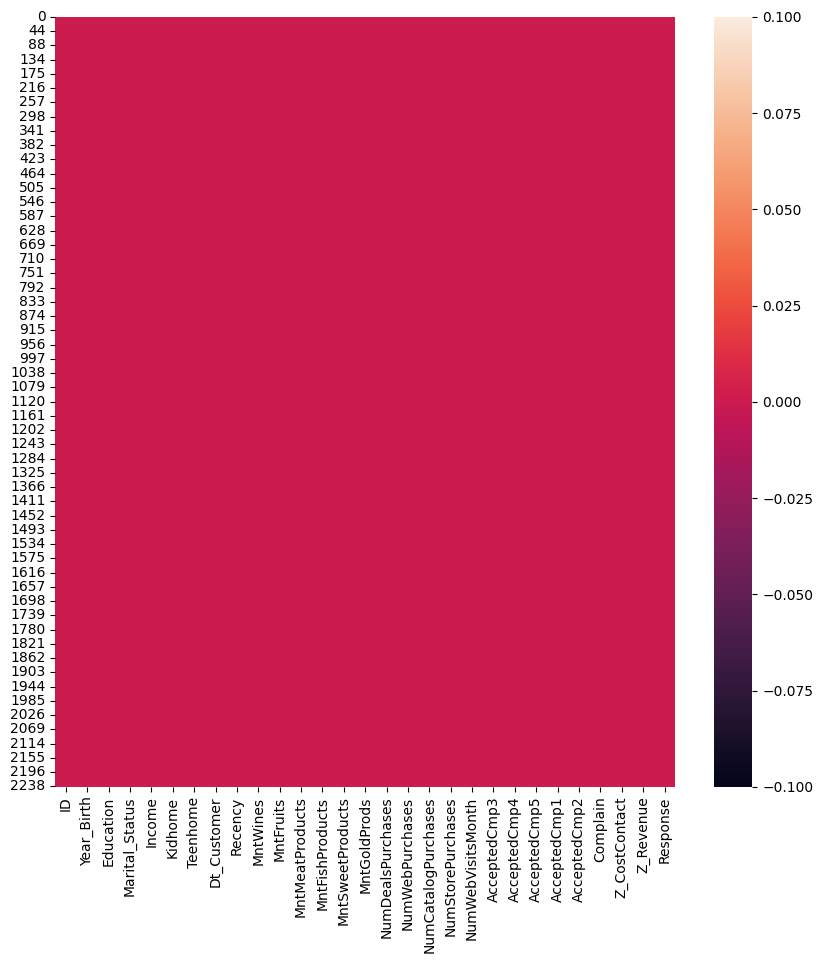

In [107]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[df.columns].isna())

### Mengganti tipe data dari **int** ke **object** pada kolom `ID`

In [108]:
df['ID'] = df['ID'].astype(str)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   object 
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

### Cek outliers pada kolom `Year_Birth`

<Axes: xlabel='Year_Birth'>

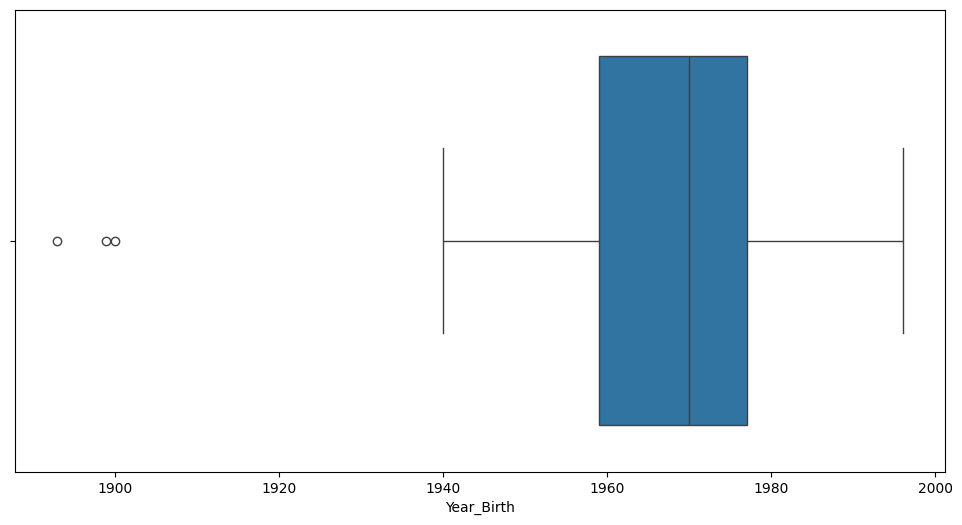

In [110]:
# Memeriksa apakah tahun kelahiran masuk akal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Year_Birth')

<Axes: xlabel='Year_Birth', ylabel='Count'>

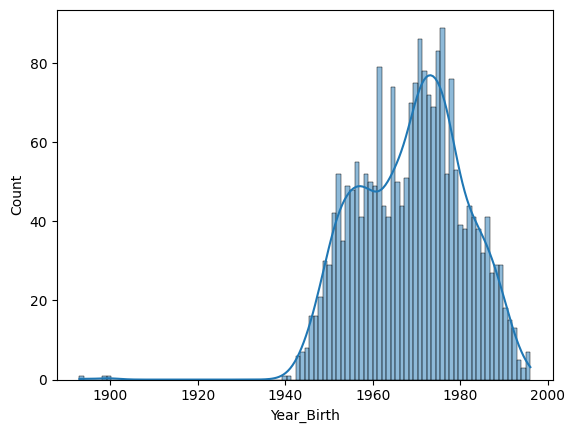

In [111]:
sns.histplot(data=df, x='Year_Birth', kde=True, bins = 100)

In [112]:
# Menghitung Q1, Q3, dan IQR
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = df[(df['Year_Birth'] < lower_bound) | (df['Year_Birth'] > upper_bound)]

print(f"Batas bawah: {lower_bound}, Batas atas: {upper_bound}")
print(f"Jumlah outlier: {len(outliers)}")

Batas bawah: 1932.0, Batas atas: 2004.0
Jumlah outlier: 3


In [113]:
df[df['Year_Birth'] < lower_bound]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


Dari kolom `Year_Birth` diatas, bisa disimpulkan bahwa: 
- Bentuk dari histogram nya merupakan Left Skewed, artinya data terdistribusi tidak normal
- Terdapat 3 customer dengan tahun kelahiran yang tidak masuk akal, dengan tahun 1900 kebawah. Dibilang tidak masuk akal karena mustahil customer tersebut masih hidup dan bisa berbelanja dengan normal di usia > 100 tahun.
- Solusinya ialah dengan menghapus datanya

In [114]:
# Menghapus outliers pada kolom Year_Birth
df.drop(df[df['Year_Birth'] < lower_bound].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2209,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2210,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2211,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


<Axes: xlabel='Year_Birth'>

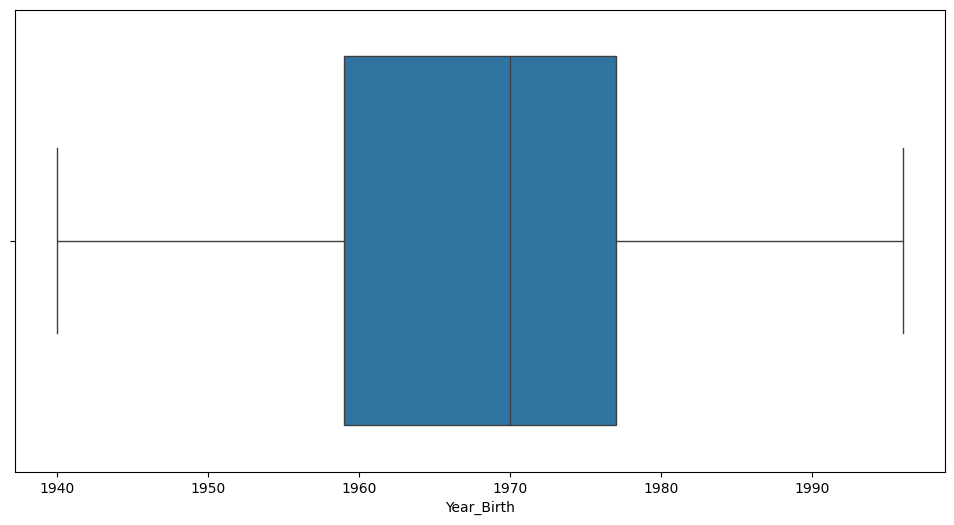

In [115]:
# Memeriksa apakah tahun kelahiran masuk akal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Year_Birth')

<Axes: xlabel='Year_Birth', ylabel='Count'>

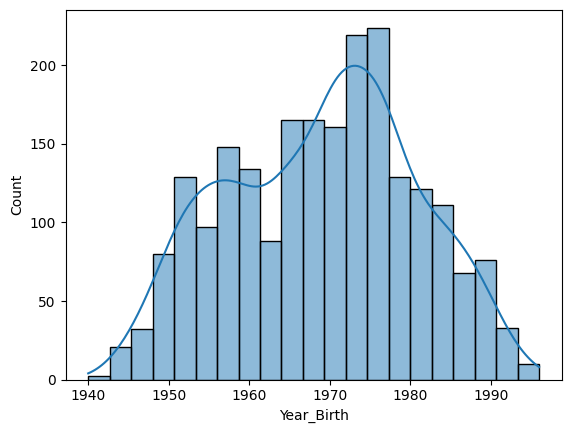

In [116]:
sns.histplot(data=df, x='Year_Birth', kde=True)

### Cleaning pada kolom `Education`

In [117]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [118]:
df['Education'].replace({
    'PhD': 'Doctorate',
    '2n Cycle': 'Master',
    'Basic': 'High School'
}, inplace=True)

In [119]:
df['Education'].unique()

array(['Graduation', 'Doctorate', 'Master', 'High School'], dtype=object)

Mengubah data pada kolom `Income`:
- Graduation -> Graduation
- PhD -> Doctore
- Master -> Master
- Basic -> High School
- 2n Cycle -> Master

Penggantian bertujuan untuk memudahkan analisis, menghindari ambiguitas, dan menyederhanakan interpretasi

### Cleaning pada kolom `Marital_Status`

In [120]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [121]:
print(df['Marital_Status'].value_counts())

Marital_Status
Married     857
Together    572
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [122]:
# Cek persentase customer yang Marital_Status = ALone/Absurd/YOLO
(len(df[df['Marital_Status'] == 'Alone']) + len(df[df['Marital_Status'] == 'Absurd']) + len(df[df['Marital_Status'] == 'YOLO'])) / len(df) * 100

0.3163126976954361

In [123]:
df['Marital_Status'].replace({
    'Alone': 'Others',
    'Absurd': 'Others',
    'YOLO': 'Others',
}, inplace=True)

In [124]:
df[df['Marital_Status'] == 'Others']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
121,433,1958,Master,Others,61331.0,1,1,10-03-2013,42,534,5,47,0,5,41,5,11,1,6,8,0,0,0,0,0,0,3,11,0
127,7660,1973,Doctorate,Others,35860.0,1,1,19-05-2014,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,3,11,1
142,92,1988,Graduation,Others,34176.0,1,0,12-05-2014,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,3,11,0
2067,7734,1993,Graduation,Others,79244.0,0,0,19-12-2012,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,3,11,1
2108,4369,1957,Master,Others,65487.0,0,0,10-01-2014,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0
2151,492,1973,Doctorate,Others,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0
2176,11133,1973,Doctorate,Others,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1


In [125]:
df.groupby(by='Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(by='Marital_Status')

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,
Divorced,75349,6357,34840,8123,6218,10714
Married,256976,21981,137888,30395,22926,36719
Others,1909,187,804,442,88,573
Single,137209,12840,87059,18255,12751,20395
Together,175960,14468,94812,22279,14967,24530
Widow,27902,2422,14085,3793,2878,4245


Cleaning pada kolom `Marital_Status` dengan cara: 
- Mengganti customer dengan `Marital_Status` Alone / Absurd / YOLO -> Others
- Karena walaupun status pernikahannya anomali, tetapi gaji mereka bukanlah outliers, dan total pengeluaran mereka untuk produk cukup tinggi

### Cek outlier pada kolom `Income`

In [126]:
print(df['Income'].describe())
print(df['Year_Birth'].describe())

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64
count    2213.000000
mean     1968.917307
std        11.700216
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64


<Axes: xlabel='Income'>

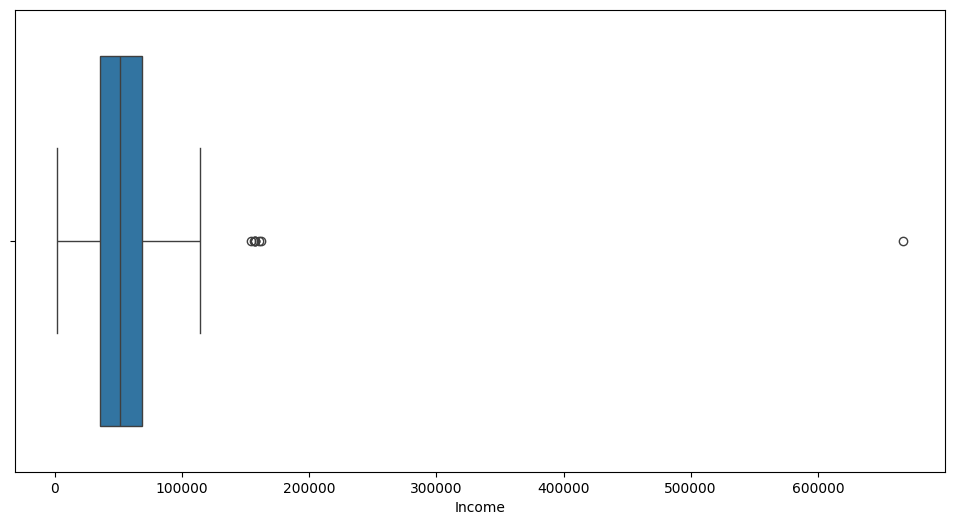

In [127]:
# Memeriksa pendapatan apakah pendapatan tersebut bernilai negatif
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Income')

<Axes: xlabel='Income', ylabel='Count'>

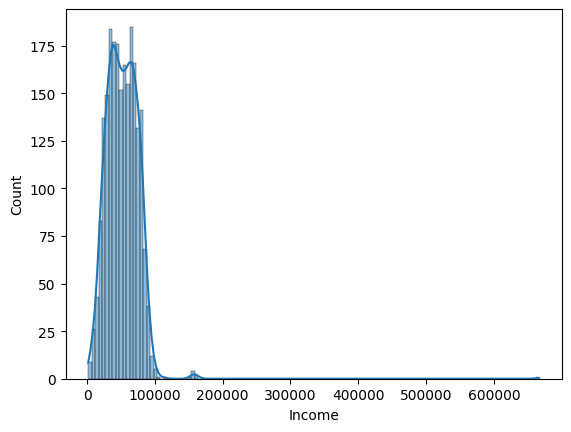

In [128]:
sns.histplot(data=df, x='Income', kde=True)

In [129]:
# Menghitung Q1, Q3, dan IQR
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]

print(f"Batas bawah: {lower_bound}, Batas atas: {upper_bound}")
print(f"Jumlah outlier: {len(outliers)}")

Batas bawah: -14615.5, Batas atas: 118348.5
Jumlah outlier: 8


In [130]:
# Menghitung persentase data pada kolom Income yang merupakan data outliers
len(outliers) / df.shape[0] * 100

0.36150022593764125

In [131]:
# Mencari rata-rata gaji customer di setiap education
# dan mengurutkan rata-rata gaji dari tinggi ke rendah berdasarkan education
df.pivot_table(values = 'Income', index = 'Education', aggfunc = np.mean).sort_values(by = 'Income', ascending = False)

,Income
Education,
Doctorate,56088.258333
Graduation,52720.373656
Master,51056.333925
High School,20306.259259


In [132]:
outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
153,8475,1973,Doctorate,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
601,1503,1976,Doctorate,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
639,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
671,1501,1982,Doctorate,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1284,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
1633,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0
2106,11181,1949,Doctorate,Married,156924.0,0,0,29-08-2013,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
2206,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


Dapat dilihat bahwa terdapat 8 baris dengan `Income` yang merupakan outlier. Jika terdapat 8 data dari total 2216 data (sekitar 0.36%) yang merupakan outliers pada kolom "Income", Ada dua cara untuk menanganinya:
- Dengan menghapus baris yang memiliki `Income` outliers.
- Dengan menggantinya dengan median dari kolom `Income` dengan `Education` tertentu

Customer dengan `Education` = Graduation dan `Income` = 666666.0 dapat dihapus karena gaji tersebut sangat tidak masuk akal untuk orang yang hanya lulus tingkat pertama (D3, D4, S1)

Tetapi yang lainnya tidak perlu dihapus, karena customer yang gajinya merupakan outliers `Education` nya rata-rata Doctorate dan Master yang artinya mereka memiliki tingkat pendidikan yang sangat tinggi. sehingga mereka mungkin mendapatkan pekerjaan yang lebih baik dibandingkan customer lain, sehingga gaji nya lebih tinggi dibandingkan rata-rata gaji berdasarkan Education tertentu. dan total pengeluaran mereka untuk produk bisa dibilang tinggi.

In [133]:
# Menghapus baris data yang gajinya merupakan outliers
df.drop(df[df['Income'] == 666666.0].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Doctorate,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2208,4001,1946,Doctorate,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2209,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2210,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [134]:
df[df['Income'] == 666666.0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


<Axes: xlabel='Income'>

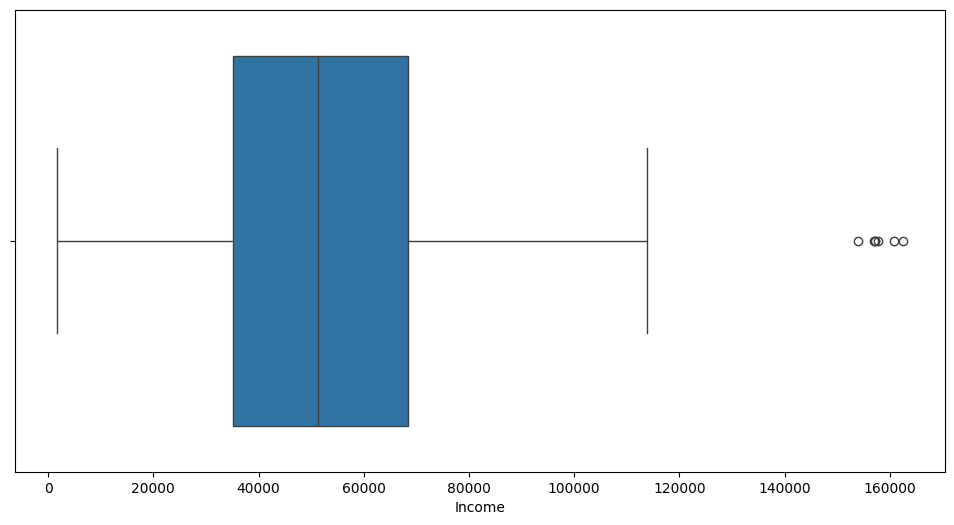

In [135]:
# Memeriksa pendapatan apakah pendapatan tersebut bernilai negatif
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Income')

<Axes: xlabel='Income', ylabel='Count'>

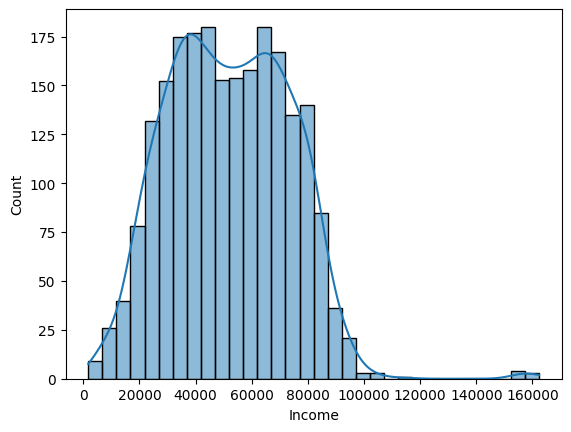

In [136]:
sns.histplot(data=df, x='Income', kde=True)

### Mengkonversi kolom `Dt_Customer` dari object ke date

In [137]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Doctorate,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2208,4001,1946,Doctorate,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2209,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2210,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [138]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [139]:
df['Dt_Customer'].unique()

<DatetimeArray>
['2012-09-04 00:00:00', '2014-03-08 00:00:00', '2013-08-21 00:00:00',
 '2014-02-10 00:00:00', '2014-01-19 00:00:00', '2013-09-09 00:00:00',
 '2012-11-13 00:00:00', '2013-05-08 00:00:00', '2013-06-06 00:00:00',
 '2014-03-13 00:00:00',
 ...
 '2014-03-27 00:00:00', '2012-12-15 00:00:00', '2012-09-17 00:00:00',
 '2013-06-02 00:00:00', '2012-12-21 00:00:00', '2013-11-01 00:00:00',
 '2013-08-10 00:00:00', '2012-10-11 00:00:00', '2012-12-20 00:00:00',
 '2014-01-09 00:00:00']
Length: 662, dtype: datetime64[ns]

In [140]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Doctorate,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2208,4001,1946,Doctorate,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2209,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2210,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### Menghapus kolom `Z_CostContact` dan `Z_Revenue`

In [141]:
df.drop(columns = ['Z_CostContact', 'Z_Revenue'], inplace = True)

### Mengecek Ambiguitas pada kolom `AcceptedCmp5` dan kolom `Response`
- dalam dataset ini, kolom `Response` artinya respon customer terhadap kampanye pemasaran terakhir. Tetapi dalam dataset ini, kolom `AcceptedCmp5` bisa jadi merupakan kampanye pemasaran terakhir.
- Untuk melihat apakah kolom `Response` dan kolom `AcceptedCmp5` memiliki korelasi, kita perlu cek.

In [142]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,Doctorate,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [143]:
df['Response'].corr(df['AcceptedCmp5'])

filtered_data = df[(df['Response'] == 1) & (df['AcceptedCmp5'] == 1)]
print(round(filtered_data.shape[0] / len(df) * 100, 2))  # Jumlah baris yang memenuhi kondisi

4.11


**Conclusion**
- Kolom `AcceptedCmp5` dan `Response` tidak saling berkorelasi
- Karena kolom `Response` artinya adalah respon customer terhadap kampanye TERAKHIR.
- Bisa saja `AcceptedCmp5` bukan kampanye terakhir.

Kolom `AcceptedCmp1 - 5` merupakan kolom yang menunjukkan bahwa customer tersebut menerima dan merespon kampanye tertentu. Artinya jika customer menerima kampanye ke-1, maka `AcceptedCmp1` = 1, kalau customer tidak menerima maka `AcceptedCmp1` = 0. begitupun seterusnya.

In [144]:
df.columns.get_loc('AcceptedCmp2')

24

In [145]:
df.insert(25, 'TotalAcceptedCmp', df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2'])

In [146]:
df[df['TotalAcceptedCmp'] == 4]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,TotalAcceptedCmp,Complain,Response
239,10089,1974,Graduation,Divorced,102692.0,0,0,2013-04-05,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,4,0,1
401,5067,1994,Graduation,Together,80134.0,0,0,2014-02-14,11,966,26,282,52,26,26,1,2,7,11,5,0,1,1,1,1,4,0,0
414,3725,1961,Doctorate,Single,84865.0,0,0,2013-05-09,1,1248,16,349,43,16,16,1,2,4,9,4,0,1,1,1,1,4,0,1
543,3174,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,4,0,1
808,5536,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,4,0,1
974,8545,1954,Graduation,Divorced,85683.0,0,0,2014-03-21,6,1296,17,311,45,69,51,1,2,4,10,1,0,1,1,1,1,4,0,1
1071,1509,1958,Doctorate,Together,84460.0,0,0,2013-01-04,80,152,27,103,106,54,81,0,9,9,4,5,0,1,1,1,1,4,0,1
1292,5758,1982,Graduation,Married,65169.0,0,0,2014-01-14,23,1074,0,69,0,0,46,1,10,4,13,6,1,0,1,1,1,4,0,1
1690,477,1986,Graduation,Married,83512.0,0,0,2014-06-17,31,1060,61,835,80,20,101,1,4,7,10,1,1,0,1,1,1,4,0,1
1902,3138,1956,Graduation,Single,91249.0,0,0,2012-10-20,84,1324,27,119,71,108,27,0,7,9,6,4,0,1,1,1,1,4,0,1


Memindahkan Kolom `AcceptedCmp1 - 5` menjadi berurutan agar mempermudah analisis

In [147]:
# Nama kolom yang ingin dipindahkan
accepted_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Pisahkan kolom lain selain AcceptedCmp1-5
other_cols = [col for col in df.columns if col not in accepted_cols]

# Temukan posisi kolom TotalAcceptedCmp
total_accepted_idx = other_cols.index('TotalAcceptedCmp')

# Susun ulang dengan AcceptedCmp1-5 tepat sebelum TotalAcceptedCmp
new_order = (
    other_cols[:total_accepted_idx] + accepted_cols + other_cols[total_accepted_idx:]
)

# Atur ulang DataFrame dengan urutan baru
df = df[new_order]

In [148]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalAcceptedCmp,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0
4,5324,1981,Doctorate,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,0
2208,4001,1946,Doctorate,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,1,0,0,0,0,1,0,0
2209,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,0,0,1,0,1,0,0
2210,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,0


In [149]:
df.info(max_cols=50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   object        
 1   Year_Birth           2212 non-null   int64         
 2   Education            2212 non-null   object        
 3   Marital_Status       2212 non-null   object        
 4   Income               2212 non-null   float64       
 5   Kidhome              2212 non-null   int64         
 6   Teenhome             2212 non-null   int64         
 7   Dt_Customer          2212 non-null   datetime64[ns]
 8   Recency              2212 non-null   int64         
 9   MntWines             2212 non-null   int64         
 10  MntFruits            2212 non-null   int64         
 11  MntMeatProducts      2212 non-null   int64         
 12  MntFishProducts      2212 non-null   int64         
 13  MntSweetProducts     2212 non-nul

### **Tambah Kolom**
- `Total_Spending` = Total pengeluaran yang dilakukan oleh user ($)
- `Avg_Spending_per_Visit` = Mengukur seberapa banyak rata-rata pengeluaran per kunjungan pelanggan
- `Age` = Umur customer. Tahun_sekarang - tahun_lahir

In [150]:
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                               'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [151]:
count_purchases = df['Total_Spending'] / (df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']).replace(0, np.nan)
df.insert(19, 'Avg_Spending_per_Visits', count_purchases)

### Menambahkan kolom `Age` dan `Generation`
- Tujuan dibuatnya kolom ini agar bisa menganalisis tren terkait usia, dan memahami perilaku generasi tertentu
- Contoh Batasan Generasi:
    - Baby Boomers: 1946–1964
    - Gen X: 1965–1980
    - Gen Y (Millennials): 1981–1996
    - Gen Z: 1997–2012
    - Gen Alpha: 2013–sekarang

In [152]:
df['Dt_Customer'].dt.year.max()

np.int32(2014)

Kita bisa mengambil tahun terbaru customer belanja di supermarket dari kolom tersebut. Kita bisa asumsikan bahwa dataset ini dibuat pada tahun 2014. Tetapi kalau melihat dari deskripsi pada kolom `MntWines`, `MntFruits`, dan kolom `Mnt` lainnya yang merupakan Total pengeluaran untuk produk tertentu dalam 2 tahun terakhir, artinya total pengeluaran untuk customer yang pertama kali belanja pada tahun 2014 masih belum ada datanya. Sedangkan pada dataset ini total pengeluaran berdasarkan produk tertentu untuk customer yang pertama kali belanja pada tahun 2014 sudah ada datanya.

Untuk itu, kita asumsikan dataset ini dibuat pada tahun 2016.

In [153]:
# Tambahkan kolom Age
latest_year = 2016
df.insert(2, 'Age', latest_year - df['Year_Birth'])

In [154]:
# Tambahkan kolom Generational Cohort
def generational_cohort(year):
    if year >= 1997 and year <= 2012:
        return 'Gen Z'
    elif year >= 1981 and year <= 1996:
        return 'Gen Y'
    elif year >= 1965 and year <= 1980:
        return 'Gen X'
    elif year >= 1946 and year <= 1964:
        return 'Baby Boomers'
    elif year < 1946:
        return 'Silent'

df.insert(3, 'Generation', df['Year_Birth'].apply(generational_cohort))

In [155]:
df

,ID,Year_Birth,Age,Generation,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Avg_Spending_per_Visits,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalAcceptedCmp,Complain,Response,Total_Spending
0,5524,1957,59,Baby Boomers,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,64.680000,7,0,0,0,0,0,0,0,1,1617
1,2174,1954,62,Baby Boomers,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,4.500000,5,0,0,0,0,0,0,0,0,27
2,4141,1965,51,Gen X,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,36.952381,4,0,0,0,0,0,0,0,0,776
3,6182,1984,32,Gen Y,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6.625000,6,0,0,0,0,0,0,0,0,53
4,5324,1981,35,Gen Y,Doctorate,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,22.210526,5,0,0,0,0,0,0,0,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,1967,49,Gen X,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,74.500000,5,0,0,0,0,0,0,0,0,1341
2208,4001,1946,70,Baby Boomers,Doctorate,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,20.181818,7,1,0,0,0,0,1,0,0,444
2209,7270,1981,35,Gen Y,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,65.315789,6,0,0,0,1,0,1,0,0,1241
2210,8235,1956,60,Baby Boomers,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,36.652174,3,0,0,0,0,0,0,0,0,843


Menambahkan kolom `Total_Transaction`
- Fungsinya untuk mengetahui jumlah transaksi yang dilakukan oleh customer

In [156]:
df.insert(22, 'Total_Transaction', df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])

In [157]:
df

,ID,Year_Birth,Age,Generation,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Avg_Spending_per_Visits,Total_Transaction,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalAcceptedCmp,Complain,Response,Total_Spending
0,5524,1957,59,Baby Boomers,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,64.680000,25,7,0,0,0,0,0,0,0,1,1617
1,2174,1954,62,Baby Boomers,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,4.500000,6,5,0,0,0,0,0,0,0,0,27
2,4141,1965,51,Gen X,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,36.952381,21,4,0,0,0,0,0,0,0,0,776
3,6182,1984,32,Gen Y,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6.625000,8,6,0,0,0,0,0,0,0,0,53
4,5324,1981,35,Gen Y,Doctorate,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,22.210526,19,5,0,0,0,0,0,0,0,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,1967,49,Gen X,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,74.500000,18,5,0,0,0,0,0,0,0,0,1341
2208,4001,1946,70,Baby Boomers,Doctorate,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,20.181818,22,7,1,0,0,0,0,1,0,0,444
2209,7270,1981,35,Gen Y,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,65.315789,19,6,0,0,0,1,0,1,0,0,1241
2210,8235,1956,60,Baby Boomers,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,36.652174,23,3,0,0,0,0,0,0,0,0,843


In [158]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2212, 33)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,object,0,2212,"[8755, 4712]"
1,Year_Birth,int64,0,56,"[1953, 1989]"
2,Age,int64,0,56,"[27, 75]"
3,Generation,object,0,4,"[Baby Boomers, Gen Y]"
4,Education,object,0,4,"[Graduation, Master]"
5,Marital_Status,object,0,6,"[Divorced, Together]"
6,Income,float64,0,1970,"[30801.0, 61346.0]"
7,Kidhome,int64,0,3,"[2, 1]"
8,Teenhome,int64,0,3,"[2, 0]"
9,Dt_Customer,datetime64[ns],0,662,"[2013-01-11T00:00:00.000000000, 2013-03-24T00:00:00.000000000]"


In [159]:
df[(df['Avg_Spending_per_Visits'].isna()) | (df['NumWebPurchases'] > 0)]

,ID,Year_Birth,Age,Generation,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Avg_Spending_per_Visits,Total_Transaction,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalAcceptedCmp,Complain,Response,Total_Spending
0,5524,1957,59,Baby Boomers,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,64.680000,25,7,0,0,0,0,0,0,0,1,1617
1,2174,1954,62,Baby Boomers,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,4.500000,6,5,0,0,0,0,0,0,0,0,27
2,4141,1965,51,Gen X,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,36.952381,21,4,0,0,0,0,0,0,0,0,776
3,6182,1984,32,Gen Y,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6.625000,8,6,0,0,0,0,0,0,0,0,53
4,5324,1981,35,Gen Y,Doctorate,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,22.210526,19,5,0,0,0,0,0,0,0,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,1967,49,Gen X,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,74.500000,18,5,0,0,0,0,0,0,0,0,1341
2208,4001,1946,70,Baby Boomers,Doctorate,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,20.181818,22,7,1,0,0,0,0,1,0,0,444
2209,7270,1981,35,Gen Y,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,65.315789,19,6,0,0,0,1,0,1,0,0,1241
2210,8235,1956,60,Baby Boomers,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,36.652174,23,3,0,0,0,0,0,0,0,0,843


disini kita dapat melihat kolom yang kosong / memiliki data NaN pada kolo `Avg_Spending_per_Visits`. Itu dikarenakan jumlah pembelian yang dilakukan pada fasilitas tertentu semuanya bernilai 0, yang artinya customer tersebut tidak pernah berbelanja di supermarket kami.

Ini cukup aneh mengingat customer tersebut memiliki total pengeluaran terhadap produk tertentu, tetapi tidak pernah berbelanja 1x pun di supermarket kami.

Asumsi saya adalah mungkin tidak terdeteksi oleh divisi staff kami ketika belanja di toko fisik, atau ketika customer tersebut belanja melalui brosur/katalog dan menghubungi customer service melalui telepon.

In [160]:
df[df['Avg_Spending_per_Visits'].isna()]

,ID,Year_Birth,Age,Generation,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Avg_Spending_per_Visits,Total_Transaction,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalAcceptedCmp,Complain,Response,Total_Spending
639,5555,1975,41,Gen X,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,6
965,3955,1965,51,Gen X,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,1,1,1,0,1,0,0,0,0,NaN,0,14,0,0,0,0,0,0,0,0,6
1504,11110,1973,43,Gen X,Graduation,Single,3502.0,1,0,2013-04-13,56,2,1,1,0,0,1,0,0,0,0,NaN,0,14,0,0,0,0,0,0,0,0,5
2106,11181,1949,67,Baby Boomers,Doctorate,Married,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,8


In [161]:
print(f"{round(len(df[df['Avg_Spending_per_Visits'].isna()]) / len(df) * 100, 2)}%")

0.18%


Karena 4 customer tersebut terdeteksi tidak pernah berbelanja di supermarket, dan total pengeluarannya juga sedikit, maka tidak akan signifikan, dan bisa dihapus saja

In [162]:
df.dropna(inplace=True)

In [163]:
df.isna().sum()

ID                         0
Year_Birth                 0
Age                        0
Generation                 0
Education                  0
Marital_Status             0
Income                     0
Kidhome                    0
Teenhome                   0
Dt_Customer                0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
Avg_Spending_per_Visits    0
Total_Transaction          0
NumWebVisitsMonth          0
AcceptedCmp1               0
AcceptedCmp2               0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
TotalAcceptedCmp           0
Complain                   0
Response                   0
Total_Spending             0
dtype: int64

In [164]:
df.columns.get_loc('Income')

6

Menambah Kolom `Visit_to_Purchases_Ratio`
- Mengukur efektivitas kunjungan web dalam menghasilkan pembelian

In [165]:
# Rasio kunjungan web terhadap pembelian
web_visit_to_purchase_ratio = df['NumWebPurchases'] / (df['NumWebVisitsMonth'] + 1e-9)
df.insert(24, 'Web_Visit_to_Purchase_Ratio', web_visit_to_purchase_ratio)

In [166]:
df.head()

,ID,Year_Birth,Age,Generation,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Avg_Spending_per_Visits,Total_Transaction,NumWebVisitsMonth,Web_Visit_to_Purchase_Ratio,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalAcceptedCmp,Complain,Response,Total_Spending
0,5524,1957,59,Baby Boomers,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,64.680000,25,7,1.142857,0,0,0,0,0,0,0,1,1617
1,2174,1954,62,Baby Boomers,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,4.500000,6,5,0.200000,0,0,0,0,0,0,0,0,27
2,4141,1965,51,Gen X,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,36.952381,21,4,2.000000,0,0,0,0,0,0,0,0,776
3,6182,1984,32,Gen Y,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6.625000,8,6,0.333333,0,0,0,0,0,0,0,0,53
4,5324,1981,35,Gen Y,Doctorate,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,22.210526,19,5,1.000000,0,0,0,0,0,0,0,0,422


Menambah Kolom `Incomee_Category`
- Mengkategorikan setiap pendapatan pada customer agar lebih mudah dianalisis

In [167]:
# Kategori pendapatan
bins = [0, 30000, 60000, 90000, df['Income'].max()]
labels = ['Low Income', 'Middle Income', 'Upper Middle Income', 'High Income']
df.insert(7, 'Income_Category', pd.cut(df['Income'], bins=bins, labels=labels))

# **3. Data Analysis**

## **Melihat hubungan kolom Income dan Total_Spending.**

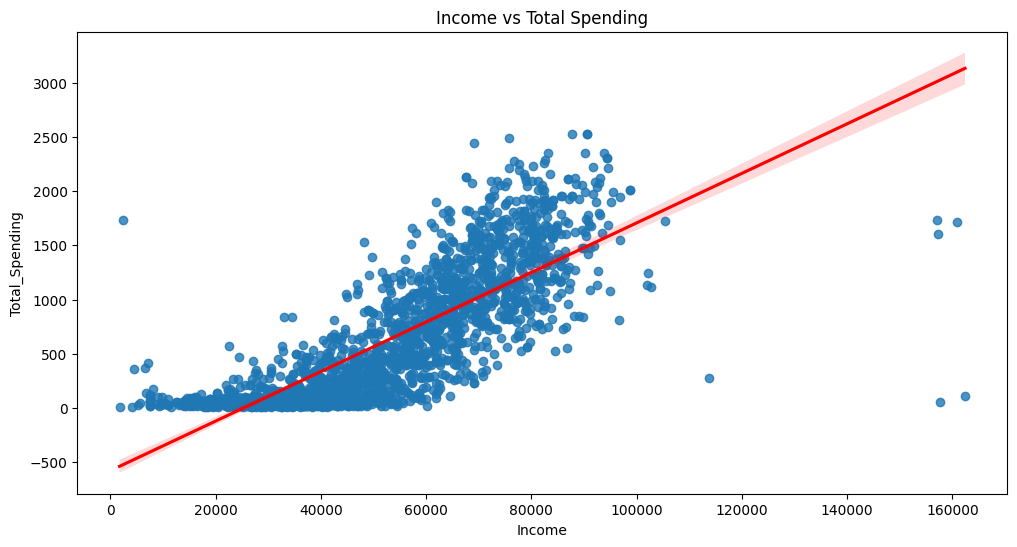

In [168]:
plt.figure(figsize=(12, 6))
sns.regplot(data = df, x = 'Income', y = 'Total_Spending', line_kws={'color': 'red'})
plt.title('Income vs Total Spending')
plt.show()

Hubungan antara Income dan Total_Spending: 
- Scatterplot menunjukkan pola positif antara pendapatan customer dan total pengeluaran mereka. Semakin tinggi pendapatan, maka akan semakin tinggi juga pengeluarannya.
- Persebaran data cukup luas. Hanya saja ada beberapa customer yang merupakan outlier. yang artinya pendapatan mereka tinggi, tetapi untuk pengeluarannya tidak terlalu tinggi. Ini tidak perlu dihapus, karena bisa saja menggambarkan kondisi yang nyata dan mencerminkan pola belanja spesifik.


In [169]:
df_sum_total_transaction_by_gen = df.groupby(by='Generation')[['Total_Transaction']].sum().sort_values(by = 'Total_Transaction', ascending=False).reset_index()
df_sum_total_transaction_by_gen

,Generation,Total_Transaction
0,Gen X,15228
1,Baby Boomers,12362
2,Gen Y,4891
3,Silent,459


**Melihat generasi mana yang memiliki total transaksi terbanyak**

<Axes: xlabel='Generation', ylabel='Total_Transaction'>

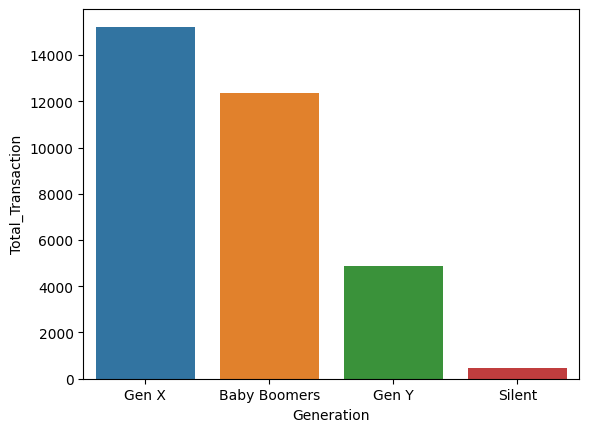

In [170]:
sns.barplot(data = df_sum_total_transaction_by_gen, x = 'Generation', y = 'Total_Transaction', hue='Generation')

Insight:
- Dari visualisasi diatas, terlihat bahwa Gen X memiliki total transaksi terbanyak, disusul Baby Boomers dengan urutan kedua, urutan ketiga ada Gen Y, dan yang terakhir Silent Generation.
- Silent Generation menjadi yang paling sedikit dibandingkan dengan generation yang lain dikarenakan jumlah data customer dengan silent generation yang belanja di supermarket tidak terlalu banyak.
- Silent Generation bisa menjadi kandidat yang perlu perhatian khusus agar bisa meningkatkan penjualan produk.

## **Melihat Distribusi pengeluaran berdasarkan kategori tertentu**
### **Dari Status Pernikahan**

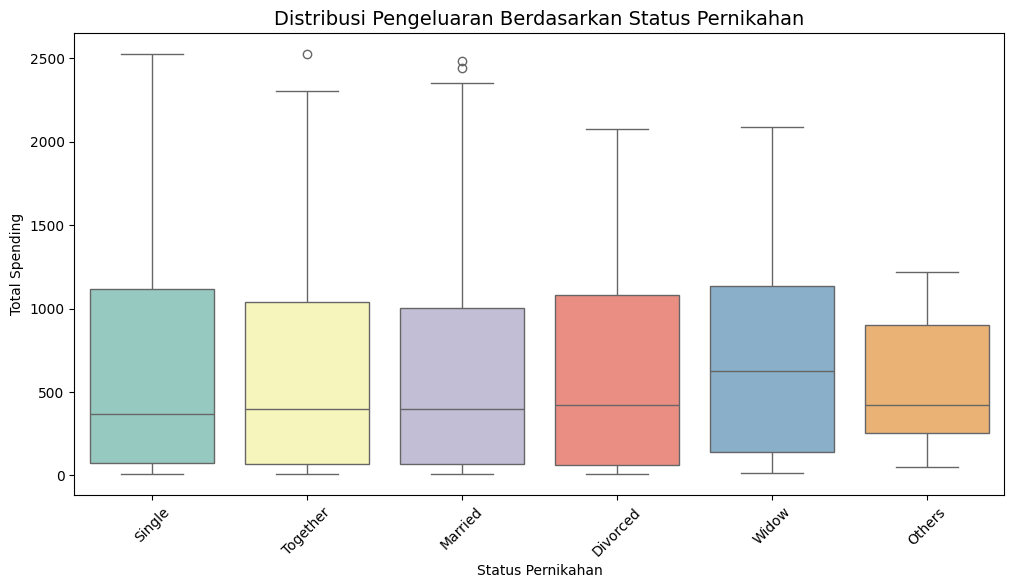

In [171]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Marital_Status', y='Total_Spending', palette='Set3')
plt.title('Distribusi Pengeluaran Berdasarkan Status Pernikahan', fontsize=14)
plt.xlabel('Status Pernikahan')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

In [172]:
# Menghitung Q1, Q3, dan IQR
Q1 = df['Total_Spending'].quantile(0.25)
Q3 = df['Total_Spending'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = df[(df['Total_Spending'] < lower_bound) | (df['Total_Spending'] > upper_bound)]

print(f"Batas bawah: {lower_bound}, Batas atas: {upper_bound}")
print(f"Jumlah outlier: {len(outliers)}")

Batas bawah: -1399.875, Batas atas: 2517.125
Jumlah outlier: 3


In [173]:
df_cond = df[(df['Marital_Status'] == 'Married') | (df['Marital_Status'] == 'Together')]
df_cond[df['Kidhome'] > 0]

,ID,Year_Birth,Age,Generation,Education,Marital_Status,Income,Income_Category,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Avg_Spending_per_Visits,Total_Transaction,NumWebVisitsMonth,Web_Visit_to_Purchase_Ratio,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalAcceptedCmp,Complain,Response,Total_Spending
3,6182,1984,32,Gen Y,Graduation,Together,26646.0,Low Income,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6.625000,8,6,0.333333,0,0,0,0,0,0,0,0,53
4,5324,1981,35,Gen Y,Doctorate,Married,58293.0,Middle Income,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,22.210526,19,5,1.000000,0,0,0,0,0,0,0,0,422
7,6177,1985,31,Gen Y,Doctorate,Married,33454.0,Middle Income,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,16.900000,10,8,0.500000,0,0,0,0,0,0,0,0,169
8,4855,1974,42,Gen X,Doctorate,Together,30351.0,Middle Income,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,7.666667,6,9,0.333333,0,0,0,0,0,0,0,1,46
9,5899,1950,66,Baby Boomers,Doctorate,Together,5648.0,Low Income,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,24.500000,2,20,0.050000,0,0,1,0,0,1,0,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,4478,1979,37,Gen X,Graduation,Married,63777.0,Upper Middle Income,1,1,2013-03-24,87,457,5,106,15,17,53,8,11,1,6,25.115385,26,8,1.375000,0,0,0,0,0,0,0,0,653
2202,10084,1972,44,Gen X,Graduation,Married,24434.0,Low Income,2,0,2014-05-18,9,3,2,8,20,0,17,2,2,1,2,7.142857,7,7,0.285714,0,0,0,0,0,0,0,0,50
2206,8372,1974,42,Gen X,Graduation,Married,34421.0,Middle Income,1,0,2013-07-01,81,3,3,7,6,2,9,1,1,0,2,7.500000,4,7,0.142857,0,0,0,0,0,0,0,0,30
2208,4001,1946,70,Baby Boomers,Doctorate,Together,64014.0,Upper Middle Income,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,20.181818,22,7,1.142857,1,0,0,0,0,1,0,0,444


Insight:

- Married: Pelanggan dengan status pernikahan "Married" memiliki rentang pengeluaran yang lebih luas dibandingkan kategori lainnya, dengan beberapa outlier di pengeluaran tinggi.
- Together: Pelanggan dengan status "Together" cenderung memiliki pengeluaran yang lebih rendah dibandingkan "Married".
- Married dan Together adalah salah dua data yang memiliki data outlier. Mungkin saja karena mereka sudah menikah, dan bebebapa customer sudah memiliki anak. Tentunya karena hal tersebut membuat pengeluaran menjadi semakin banyak dibandingkan kategori lainnya.
- Single: Pelanggan "Single" memiliki pengeluaran yang cukup bervariasi tetapi tidak setinggi pelanggan "Married".
- Others: Pengeluaran pelanggan dengan status ini lebih rendah dan lebih seragam. Meskipun datanya kecil, mungkin untuk kategori inilah yang akan menjadi target prioritas untuk meningkatkan keuntungan.

### **Dari Tingkat Pendidikan**

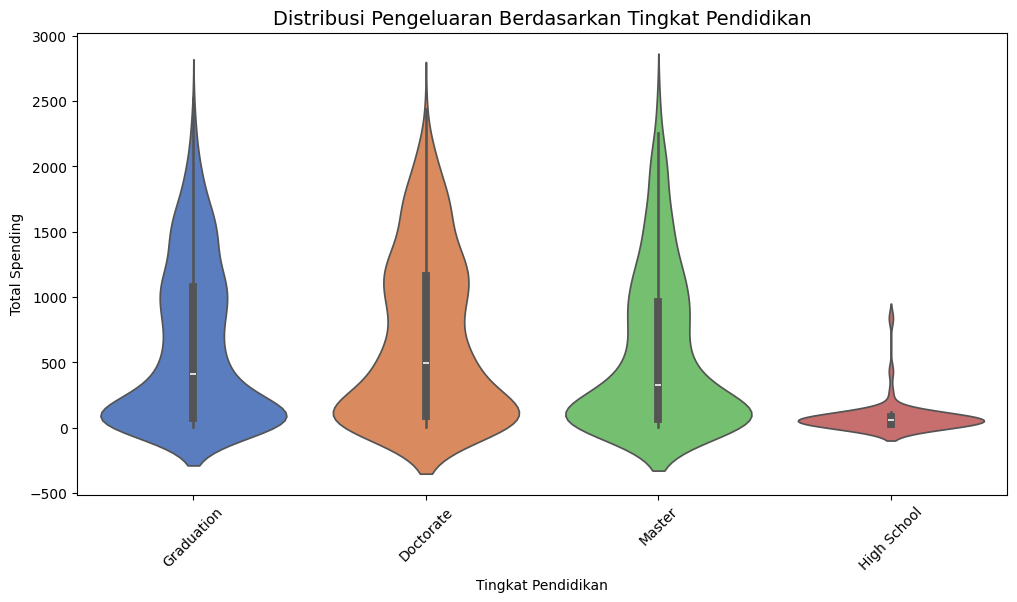

In [174]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Education', y='Total_Spending', palette='muted')
plt.title('Distribusi Pengeluaran Berdasarkan Tingkat Pendidikan', fontsize=14)
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

In [175]:
df.groupby(by = 'Education')[['Income']].mean().sort_values(by='Income', ascending=False).reset_index()

,Education,Income
0,Doctorate,55877.745303
1,Graduation,52164.553957
2,Master,51056.333925
3,High School,20306.259259


Insight: 
- Doctorate: Pelanggan dengan tingkat pendidikan Doctorate memiliki pengeluaran tinggi dengan distribusi yang tersebar merata.
- Master: Pengeluaran untuk kategori ini mirip dengan Doctorate tetapi sedikit lebih rendah.
- High School: Pelanggan dengan pendidikan High School memiliki pengeluaran yang paling rendah dibandingkan kategori lainnya. Bisa jadi karena customer dengan pendidikan High School jumlahnya lebih sedikit dibandingkan dengan kategori pendidikan lainnya. Sehingga total pendapatan customer dengan pendidikan High School lebih rendah dibandingkan dengan kategori pendidikan lainnya. 
- Kategori pendidikan High School bisa menjadi kandidat yang perlu perhatian lebih agar bisa meningkatkan penjualan. Seperti yang diketahui kategori High School adalah customer yang pendidikannya hanya sebatas SMA/SMK, divisi dari pekerjaan mungkin bukan berada di tempat yang tinggi / hanya sebatas karyawan saja. Dapat dilihat dari rata-rata gaji berdasarkan education, dimana kategori High School merupakan yang terendah dibandingkan dengan kategori lainnya.
- Karena rata-rata gajinya rendah, maka total pengeluarannya juga tidak sebesar kategori lainnya.
- Insight ini menunjukkan bahwa tingkat pendidikan memengaruhi pengeluaran pelanggan, dengan mereka yang memiliki pendidikan lebih tinggi cenderung menghabiskan lebih banyak.

### **Rata-rata pengeluaran berdasarkan Status pernikahan**

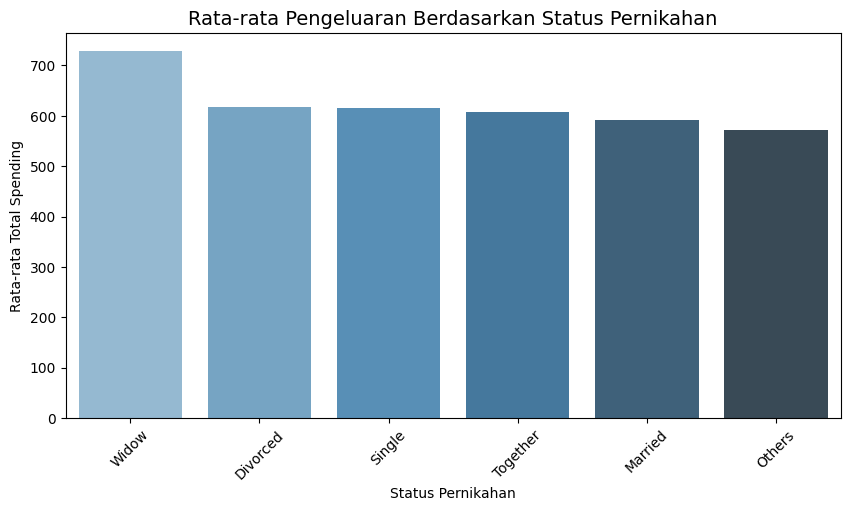

In [176]:
avg_spending = df.groupby(by='Marital_Status')[['Total_Spending']].mean().sort_values(by = 'Total_Spending', ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=avg_spending, x='Marital_Status', y='Total_Spending', palette='Blues_d')
plt.title('Rata-rata Pengeluaran Berdasarkan Status Pernikahan', fontsize=14)
plt.xlabel('Status Pernikahan')
plt.ylabel('Rata-rata Total Spending')
plt.xticks(rotation=45)
plt.show()

In [177]:
df.groupby(by = 'Marital_Status')[['Income']].mean().sort_values(by='Income', ascending=False).reset_index()

,Marital_Status,Income
0,Widow,56481.552632
1,Others,53280.285714
2,Divorced,52672.995633
3,Together,52118.201401
4,Married,51602.082944
5,Single,51077.027719


- Married: Memiliki rata-rata pengeluaran tertinggi dibandingkan kategori lainnya. Pelanggan ini cenderung menjadi target utama pemasaran.
- Single: Meski rata-rata pengeluaran lebih rendah, kategori ini tetap signifikan karena potensi pengeluaran mereka di masa depan.
- Others: Rata-rata pengeluaran mereka cukup rendah, tetapi bisa menjadi target khusus dengan strategi pemasaran yang disesuaikan.
- Widow: Merupakan rata-rata pengeluaran yang paling tinggi dibandingkan dengan kategori lainnya, walaupun dengan proporsi customer dengan Marital_Status = Widow salah satu yang paling sedikit setelah kategori Others dibandingkan dengan kategori lainnya. Kategori sisanya tidak terpantau jauh dari Widow.

### **Proporsi Total Customer berdasarkan kategori tertentu**

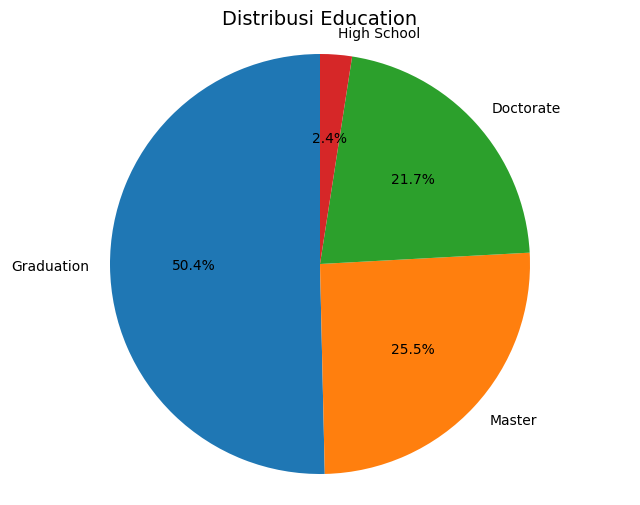

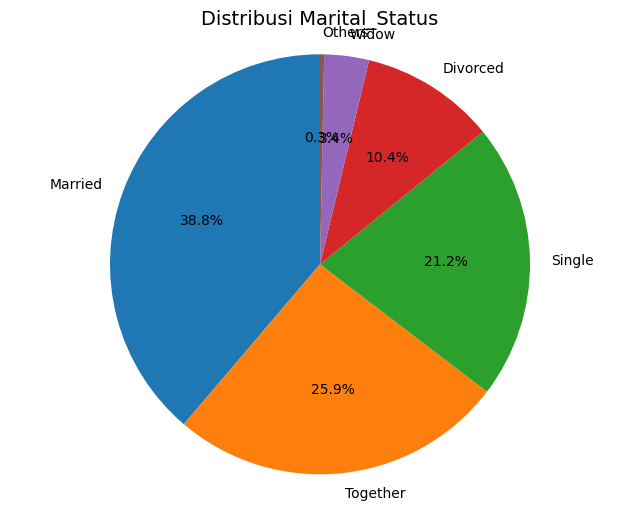

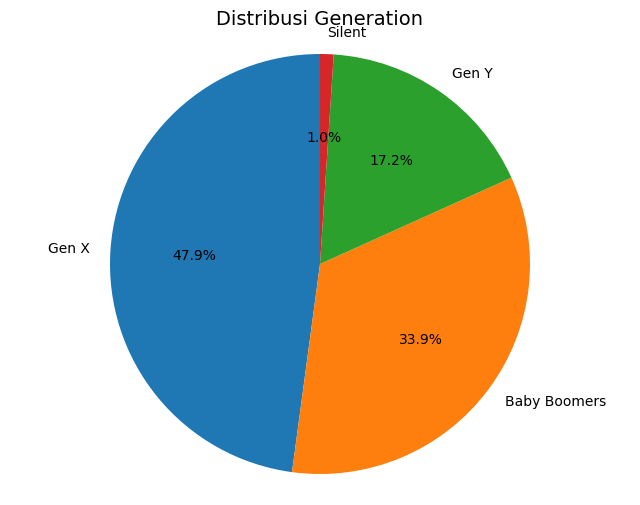

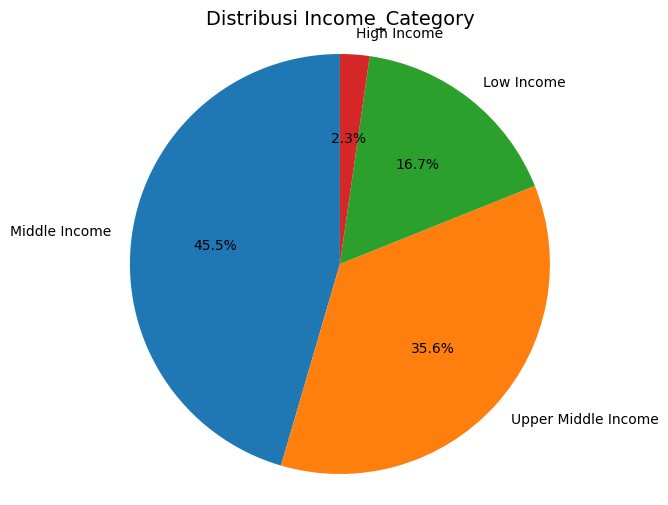

In [178]:
columns_to_plot = ['Education', 'Marital_Status', 'Generation', 'Income_Category']

# Fungsi untuk membuat pie plot
def create_pieplot(df, column):
    counts = df[column].value_counts()
    labels = counts.index
    sizes = counts.values

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
    plt.title(f'Distribusi {column}', fontsize=14)
    plt.axis('equal')  # Membuat pie chart bulat
    plt.show()

# Perulangan untuk setiap kolom
for column in columns_to_plot:
    create_pieplot(df, column)

In [179]:
df[df['Generation'] == 'Silent']

,ID,Year_Birth,Age,Generation,Education,Marital_Status,Income,Income_Category,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Avg_Spending_per_Visits,Total_Transaction,NumWebVisitsMonth,Web_Visit_to_Purchase_Ratio,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalAcceptedCmp,Complain,Response,Total_Spending
37,2968,1943,73,Silent,Doctorate,Divorced,48948.0,Middle Income,0,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,37.583333,24,6,1.166667,0,0,1,0,0,1,0,1,902
94,9370,1945,71,Silent,Doctorate,Married,65846.0,Upper Middle Income,0,0,2013-05-17,68,562,81,276,80,40,81,1,6,3,6,70.000000,16,4,1.500000,0,0,0,0,0,0,0,0,1120
150,9260,1945,71,Silent,Doctorate,Married,70356.0,Upper Middle Income,0,0,2012-11-05,20,1349,16,249,43,16,33,2,10,6,9,63.185185,27,6,1.666667,0,0,0,0,0,0,0,0,1706
342,6142,1943,73,Silent,Master,Married,65073.0,Upper Middle Income,0,0,2013-08-20,65,629,17,177,69,0,8,1,5,3,5,64.285714,14,2,2.500000,0,0,0,0,0,0,1,0,900
399,7106,1943,73,Silent,Doctorate,Married,75865.0,Upper Middle Income,0,0,2014-03-31,73,483,0,591,156,0,12,1,3,5,10,65.368421,19,1,3.000000,0,0,0,0,0,0,0,0,1242
408,6932,1941,75,Silent,Doctorate,Married,93027.0,High Income,0,0,2013-04-13,77,1285,42,716,55,0,21,0,7,10,5,96.318182,22,2,3.500000,0,0,0,0,1,1,0,0,2119
478,6605,1944,72,Silent,Doctorate,Divorced,55614.0,Middle Income,0,0,2013-11-27,85,504,13,131,8,0,26,1,9,4,6,34.100000,20,7,1.285714,0,0,0,1,0,1,0,0,682
483,466,1944,72,Silent,Graduation,Married,65275.0,Upper Middle Income,0,0,2013-04-03,9,388,14,218,91,14,21,1,4,3,13,35.523810,21,2,2.000000,0,0,0,0,0,0,0,0,746
503,3711,1944,72,Silent,Master,Married,80184.0,Upper Middle Income,0,0,2014-03-01,19,1035,134,670,25,38,0,1,6,3,10,95.100000,20,3,2.000000,1,0,0,0,1,2,0,0,1902
595,4587,1944,72,Silent,Master,Widow,45006.0,Middle Income,0,0,2013-07-18,90,162,25,53,16,0,10,1,3,1,7,22.166667,12,3,1.000000,0,0,0,0,0,0,0,0,266


Visualisasi Insight:

- Berdasarkan Pendidikan: 
    - Tingkat pendidikan tertinggi didominasi oleh kelompok dengan pendidikan "Graduation".
    - Pendidikan High School memiliki proporsi yang paling kecil dibandingkan kategori lainnya.
- Berdasarkan Status Pernikahan:
    - Mayoritas pelanggan berada pada kategori "Married" dan "Together".
    - Status "Single" dan "Divorced" juga memberikan kontribusi signifikan, sementara kategori unik seperti "Others" memiliki persentase kecil. Mungkin disebabkan kategori Others adalah kategori yang sangat spesifik dibandingkan dengan yang lainnya.
- Berdasarkan Generasi:
    - Generasi Gen X dan Boomers memiliki proporsi yang hampir setara dan mendominasi dataset.
    - Generasi Gen Y memiliki jumlah yang signifikan, sementara Gen Z memiliki proporsi yang paling kecil.
    - Generasi Silent memiliki jumlah proporsi yang paling sedikit dibandingkan dengan kategori lainnya. Mungkin saja disebabkan oleh faktor umur. Sehingga untuk kategori ini perlu perhatian khusus.
- Berdasarkan Kategori pendapatan:
    - Proporsi didominasi oleh Middle Income dan Upper Middle Income dengan selisih 10%
    - Low Income di 16%, dan yang memiliki proporsi paling sedikit ialah kategori High Income dengan total 2,3% saja
    - Itu menunjukkan bahwa perlu perhatian lebih terhadap kategori High Income agar bisa menambah customer baru dengan gaji yang sangat tinggi. Hal itu juga bisa meningkatkan penjualan

Conclusion:
- Untuk kategori High School, Others, dan Silent Generation perlu perhatian khusus agar bisa menambah customer-customer baru dengan kategori tersebut.

In [180]:
df.head()

,ID,Year_Birth,Age,Generation,Education,Marital_Status,Income,Income_Category,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Avg_Spending_per_Visits,Total_Transaction,NumWebVisitsMonth,Web_Visit_to_Purchase_Ratio,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalAcceptedCmp,Complain,Response,Total_Spending
0,5524,1957,59,Baby Boomers,Graduation,Single,58138.0,Middle Income,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,64.680000,25,7,1.142857,0,0,0,0,0,0,0,1,1617
1,2174,1954,62,Baby Boomers,Graduation,Single,46344.0,Middle Income,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,4.500000,6,5,0.200000,0,0,0,0,0,0,0,0,27
2,4141,1965,51,Gen X,Graduation,Together,71613.0,Upper Middle Income,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,36.952381,21,4,2.000000,0,0,0,0,0,0,0,0,776
3,6182,1984,32,Gen Y,Graduation,Together,26646.0,Low Income,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6.625000,8,6,0.333333,0,0,0,0,0,0,0,0,53
4,5324,1981,35,Gen Y,Doctorate,Married,58293.0,Middle Income,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,22.210526,19,5,1.000000,0,0,0,0,0,0,0,0,422


In [181]:
df['AcceptedCmp1'].sum()

np.int64(142)

### **Menampilkan Jumlah customer yang menerima Pemasaran**

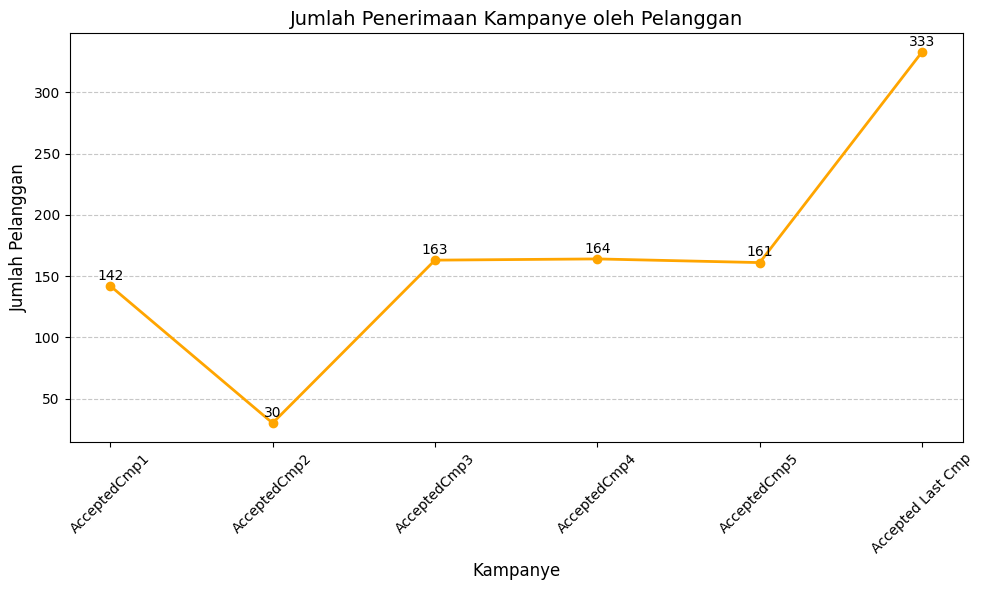

In [182]:
data_col = {
    'AcceptedCmp1': [df['AcceptedCmp1'].sum()],
    'AcceptedCmp2': [df['AcceptedCmp2'].sum()],
    'AcceptedCmp3': [df['AcceptedCmp3'].sum()],
    'AcceptedCmp4': [df['AcceptedCmp4'].sum()],
    'AcceptedCmp5': [df['AcceptedCmp5'].sum()],
    'Accepted Last Cmp': [df['Response'].sum()]
}

# Dataframe dari jumlah penerimaan
df_c = pd.DataFrame(data_col)

df_t = df_c.transpose()
df_t.columns = ['Count']

# Plot slope chart
plt.figure(figsize=(10, 6))
plt.plot(df_t.index, df_t['Count'], marker='o', linestyle='-', color='orange', linewidth=2)

# Tambahkan nilai pada setiap titik
for i, value in enumerate(df_t['Count']):
    plt.text(i, value + 5, f"{value:.0f}", ha='center', fontsize=10)

# Atur visualisasi
plt.title('Jumlah Penerimaan Kampanye oleh Pelanggan', fontsize=14)
plt.xlabel('Kampanye', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan plot
plt.show()

Insight:
- Efektivitas Kampanye Terakhir: Kampanye terakhir memiliki jumlah penerimaan yang jauh lebih tinggi dibandingkan kampanye sebelumnya, menunjukkan adanya strategi yang berhasil diterapkan.
- Kampanye Awal: Penerimaan kampanye awal (AcceptedCmp2) sangat rendah, mungkin memerlukan evaluasi strategi.
- Tren Stabil di Tengah: Kampanye tengah (AcceptedCmp1, AcceptedCmp3 hingga AcceptedCmp5) menunjukkan pola penerimaan yang relatif stabil.

### **Menampilkan Jumlah Customer baru per Bulan**

In [183]:
# Menambahkan kolom bulan dan tahun
df['YearMonth'] = df['Dt_Customer'].dt.to_period('M')

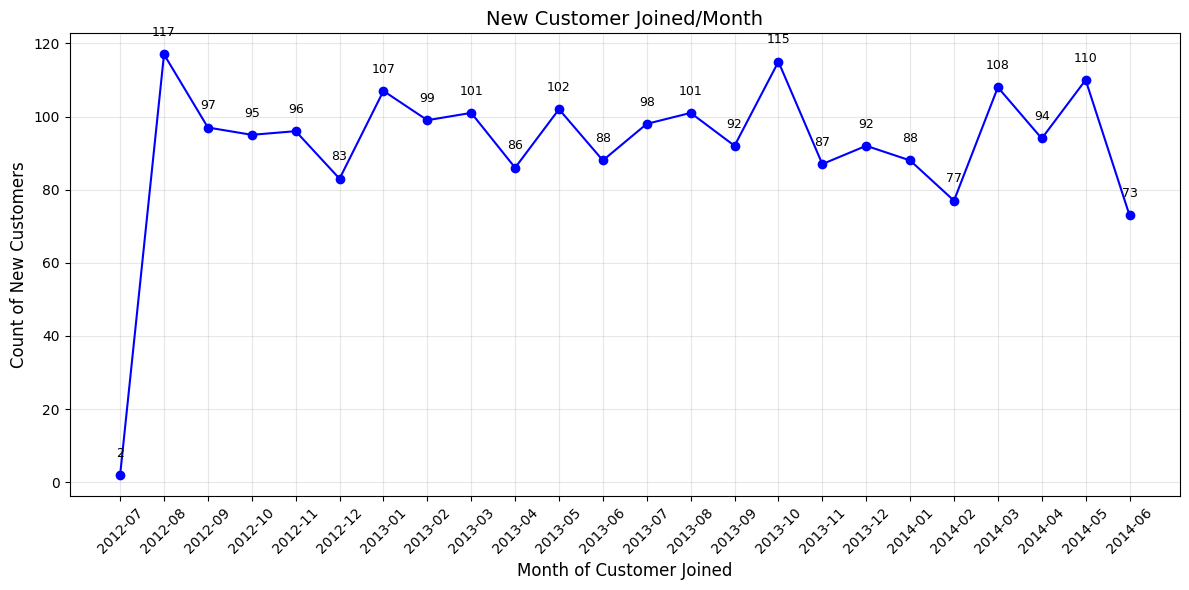

In [184]:
# Menghitung jumlah pelanggan baru setiap bulan
customer_count = df.groupby('YearMonth')['ID'].count().reset_index()
customer_count['YearMonth'] = customer_count['YearMonth'].astype(str)  # Konversi kembali ke string untuk visualisasi

# Membuat lineplot
plt.figure(figsize=(12, 6))
plt.plot(customer_count['YearMonth'], customer_count['ID'], marker='o', color='blue')

# Menambahkan anotasi angka di setiap titik
for i, value in enumerate(customer_count['ID']):
    plt.text(customer_count['YearMonth'][i], value + 5, str(value), ha='center', fontsize=9, color='black')

# Memberikan judul dan label
plt.title('New Customer Joined/Month', fontsize=14)
plt.xlabel('Month of Customer Joined', fontsize=12)
plt.ylabel('Count of New Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()

# Menampilkan grafik
plt.show()

Insight:
- Grafik menunjukkan fluktuasi jumlah pelanggan baru setiap bulan. Ada beberapa bulan dengan puncak (seperti Juli 2012 dan Desember 2013) dan beberapa bulan dengan penurunan signifikan.
- Juli 2012 mencatat jumlah pelanggan baru tertinggi (702). Hal ini bisa disebabkan oleh peluncuran kampanye pemasaran besar, diskon musiman, atau strategi akuisisi pelanggan baru.
- Desember 2013 dan Maret 2014 menunjukkan peningkatan yang signifikan, kemungkinan besar terkait dengan musim belanja akhir tahun atau promosi khusus.
- Penurunan di bulan Juni 2013 dan Julni 2014 mungkin disebabkan oleh Penurunan promosi, Musim liburan, ketidakpuasan customer, atau konsumen berpindah ke supermarket lain.

In [185]:
df

,ID,Year_Birth,Age,Generation,Education,Marital_Status,Income,Income_Category,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Avg_Spending_per_Visits,Total_Transaction,NumWebVisitsMonth,Web_Visit_to_Purchase_Ratio,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalAcceptedCmp,Complain,Response,Total_Spending,YearMonth
0,5524,1957,59,Baby Boomers,Graduation,Single,58138.0,Middle Income,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,64.680000,25,7,1.142857,0,0,0,0,0,0,0,1,1617,2012-09
1,2174,1954,62,Baby Boomers,Graduation,Single,46344.0,Middle Income,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,4.500000,6,5,0.200000,0,0,0,0,0,0,0,0,27,2014-03
2,4141,1965,51,Gen X,Graduation,Together,71613.0,Upper Middle Income,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,36.952381,21,4,2.000000,0,0,0,0,0,0,0,0,776,2013-08
3,6182,1984,32,Gen Y,Graduation,Together,26646.0,Low Income,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6.625000,8,6,0.333333,0,0,0,0,0,0,0,0,53,2014-02
4,5324,1981,35,Gen Y,Doctorate,Married,58293.0,Middle Income,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,22.210526,19,5,1.000000,0,0,0,0,0,0,0,0,422,2014-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,1967,49,Gen X,Graduation,Married,61223.0,Upper Middle Income,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,74.500000,18,5,1.800000,0,0,0,0,0,0,0,0,1341,2013-06
2208,4001,1946,70,Baby Boomers,Doctorate,Together,64014.0,Upper Middle Income,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,20.181818,22,7,1.142857,1,0,0,0,0,1,0,0,444,2014-06
2209,7270,1981,35,Gen Y,Graduation,Divorced,56981.0,Middle Income,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,65.315789,19,6,0.333333,0,0,0,1,0,1,0,0,1241,2014-01
2210,8235,1956,60,Baby Boomers,Master,Together,69245.0,Upper Middle Income,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,36.652174,23,3,2.000000,0,0,0,0,0,0,0,0,843,2014-01


### Churn Probability
- Menghitung seberapa banyak customer yang berpotensi tidak berbelanja lagi.
- Dihitng dari pengeluaran pelanggan (row['Total_Spending']) kurang dari 50% dari pengeluaran rata-rata tahun sebelumnya, pelanggan dianggap churn dan nilai Churn pada baris tersebut diubah menjadi 1. Kalau (row['Total_Spending']) lebih dari 50% dari pengeluaran rata-rata tahun sebelumnya, maka dianggap tidak Churn dan nilai akan tetap 0

In [186]:
df['Year'] = pd.to_datetime(df['Dt_Customer']).dt.year

# Kelompokkan berdasarkan tahun
spending_by_year = df.groupby('Year')['Total_Spending'].mean()

df['Churn'] = 0
for idx, row in df.iterrows():
    if row['Year'] > min(df['Year']):
        prev_year_spending = spending_by_year[row['Year'] - 1]
        if row['Total_Spending'] < prev_year_spending * 0.5:
            df.loc[idx, 'Churn'] = 1

In [187]:
df.groupby('Year')['Total_Spending'].mean()

Year
2012    746.597959
2013    603.051370
2014    496.463636
Name: Total_Spending, dtype: float64

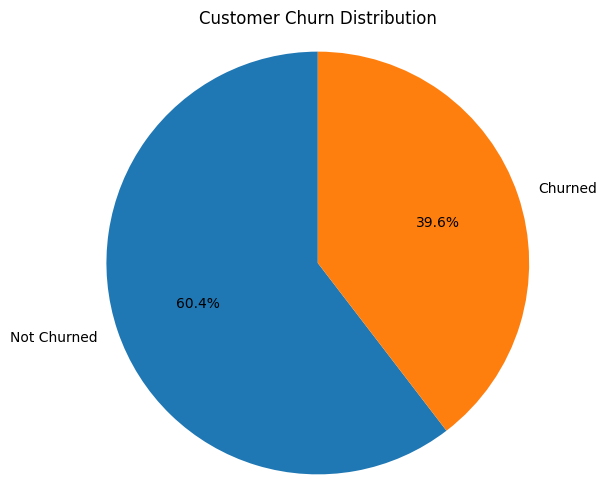

In [188]:
# Proporsi churn
churn_counts = df['Churn'].value_counts()
labels = ['Not Churned', 'Churned']
sizes = churn_counts

# Pie plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn Distribution')
plt.axis('equal')  # Membuat pie chart bulat
plt.show()

Insight:
- Dari visualisasi diatas, dapat disimpulkan bahwa customer yang tidak akan berbelanja lagi lebih sedikit dengan total 39,6% proporsinya dibandingkan customer yang balik berbelanja lagi. Ini menunjukkan bahwa customer lebih banyak yang loyal dibandingkan yang loyal.
- Walaupun Not Churned memiliki proporsi yang lebih besar dibandingkan yang churned, tetapi masih bisa ditingkatkan lagi proporsi not churnednya.

Untuk lebih detailnya customer siapa saja yang akan churn, mari kita breakdown lebih spesifik berdasarkan kategori tertentu

In [189]:
df_churn_edu = df[df['Churn'] == 1].groupby(by = 'Education')[['ID']].count().sort_values(by = 'ID', ascending=False).reset_index()
df_churn_mar = df[df['Churn'] == 1].groupby(by = 'Marital_Status')[['ID']].count().sort_values(by = 'ID', ascending=False).reset_index()
df_churn_gen = df[df['Churn'] == 1].groupby(by = 'Generation')[['ID']].count().sort_values(by = 'ID', ascending=False).reset_index()
df_churn_inc = df[df['Churn'] == 1].groupby(by = 'Income_Category')[['ID']].count().sort_values(by = 'ID', ascending=False).reset_index()
display(df_churn_edu, df_churn_mar, df_churn_gen, df_churn_inc)

,Education,ID
0,Graduation,422
1,Master,249
2,Doctorate,171
3,High School,32


,Marital_Status,ID
0,Married,346
1,Together,226
2,Single,189
3,Divorced,92
4,Widow,19
5,Others,2


,Generation,ID
0,Gen X,463
1,Baby Boomers,236
2,Gen Y,171
3,Silent,4


,Income_Category,ID
0,Middle Income,577
1,Low Income,273
2,Upper Middle Income,21
3,High Income,3


<Axes: xlabel='Income_Category', ylabel='ID'>

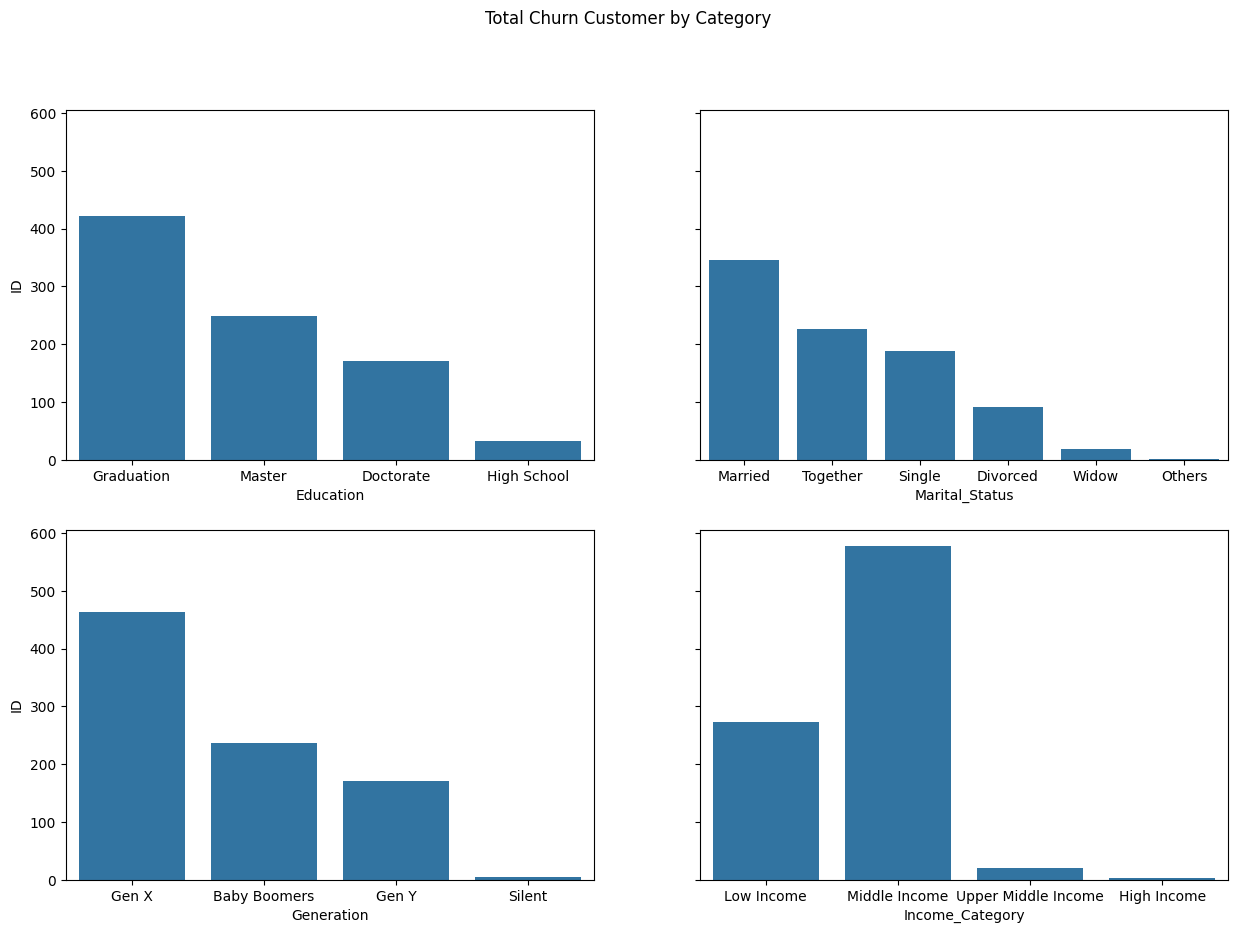

In [190]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Total Churn Customer by Category')

sns.barplot(ax=axes[0, 0], data=df_churn_edu, x = 'Education', y = 'ID')

sns.barplot(ax=axes[0, 1], data=df_churn_mar, x = 'Marital_Status', y = 'ID')

sns.barplot(ax=axes[1, 0], data=df_churn_gen, x = 'Generation', y = 'ID')

sns.barplot(ax=axes[1, 1], data=df_churn_inc, x = 'Income_Category', y = 'ID')

Insight:
- Berikut adalah visualisasi untuk urutan kategori-kategori yang berpotensi untuk Churn.
- Education:
    - Kategori Graduation merupakan kategori yang tertinggi, dan yang terendah adalah High School.
    - Kesimpulannya, walaupun high school merupakan customer dengan proporsi terendah, tetapi kemungkinan untuk churnnya paling sedikit. Itu bisa saja disebabkan oleh customer dengan Education = High School tidak terlalu banyak.
    - Kategori Graduation perlu perhatian lebih agar customer dengan kategori tersebut dapat loyal ke perusahaan supermarket kami
- Marital_Status:
    - Kategori Married merupakan kategori yang tertinggi, dan yang terendah adalah kategori Others
    - Karena customer dengan kolom Others tidak terlalu banyak, sehingga tidak perlu menjadi titik fokus
    - Kita perlu fokus terhadap kategori Married. Karena harusnya, keluarga yang sudah menikah, terutama untuk keluarga yang sudah memiliki keluarga, pasti besar kemungkinan pernah belanja bulanan di supermarket. Kita perlu analisis lebih jauh tentang kategori ini.
- Generation:
    - Kategori Gen X merupakan kategori yang tertinggi, dan yang terendah adalah kategori Silent.
    - Kategori Gen X juga perlu perhatian lebih agar bisa meningkatkan loyaliatas pada kategori ini.
- Income_Category:
    - Kategori Middle Income merupakan kategori yang tertinggi, dan yang terendah adalah kategori High Incoem.
    - Middle Income perlu mendapatkan perhatian lebih, agar customer yang berpotensi untuk churn bisa lebih berkurang dalam kategori ini.

Untuk itu, mari kita breakdown lebih detail lagi.

In [191]:
df_churn_grad_prop = df[df['Education'] == 'Graduation'].groupby(by = 'Churn')[['ID']].count().sort_values(by = 'ID', ascending=False).reset_index()
df_churn_mar_prop = df[df['Marital_Status'] == 'Married'].groupby(by = 'Churn')[['ID']].count().sort_values(by = 'ID', ascending=False).reset_index()
df_churn_genx_prop = df[df['Generation'] == 'Gen X'].groupby(by = 'Churn')[['ID']].count().sort_values(by = 'ID', ascending=False).reset_index()
df_churn_mid_prop = df[df['Income_Category'] == 'Middle Income'].groupby(by = 'Churn')[['ID']].count().sort_values(by = 'ID', ascending=False).reset_index()
display(df_churn_grad_prop, df_churn_mar_prop, df_churn_genx_prop, df_churn_mid_prop)

,Churn,ID
0,0,690
1,1,422


,Churn,ID
0,0,510
1,1,346


,Churn,ID
0,0,594
1,1,463


,Churn,ID
0,1,577
1,0,427


Dari tabel-tabel diatas, dapat disimpullkan bahwa walaupun kategori-kategori tersebut berpotensi untuk churn, tetapi jika dibandingkan dengan yang tidak churn, customer yang tidak churn masih lebih banyak dibandingkan yang churn.

tetapi kategori ini tetap perlu perhatian lebih dan harus diberikan rekomendasi agar dapat meningkatkan loyalitas costumer supermarket.

1 = Churn
0 = Tidak Churn

In [192]:
df.head()

,ID,Year_Birth,Age,Generation,Education,Marital_Status,Income,Income_Category,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Avg_Spending_per_Visits,Total_Transaction,NumWebVisitsMonth,Web_Visit_to_Purchase_Ratio,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalAcceptedCmp,Complain,Response,Total_Spending,YearMonth,Year,Churn
0,5524,1957,59,Baby Boomers,Graduation,Single,58138.0,Middle Income,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,64.680000,25,7,1.142857,0,0,0,0,0,0,0,1,1617,2012-09,2012,0
1,2174,1954,62,Baby Boomers,Graduation,Single,46344.0,Middle Income,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,4.500000,6,5,0.200000,0,0,0,0,0,0,0,0,27,2014-03,2014,1
2,4141,1965,51,Gen X,Graduation,Together,71613.0,Upper Middle Income,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,36.952381,21,4,2.000000,0,0,0,0,0,0,0,0,776,2013-08,2013,0
3,6182,1984,32,Gen Y,Graduation,Together,26646.0,Low Income,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6.625000,8,6,0.333333,0,0,0,0,0,0,0,0,53,2014-02,2014,1
4,5324,1981,35,Gen Y,Doctorate,Married,58293.0,Middle Income,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,22.210526,19,5,1.000000,0,0,0,0,0,0,0,0,422,2014-01,2014,0


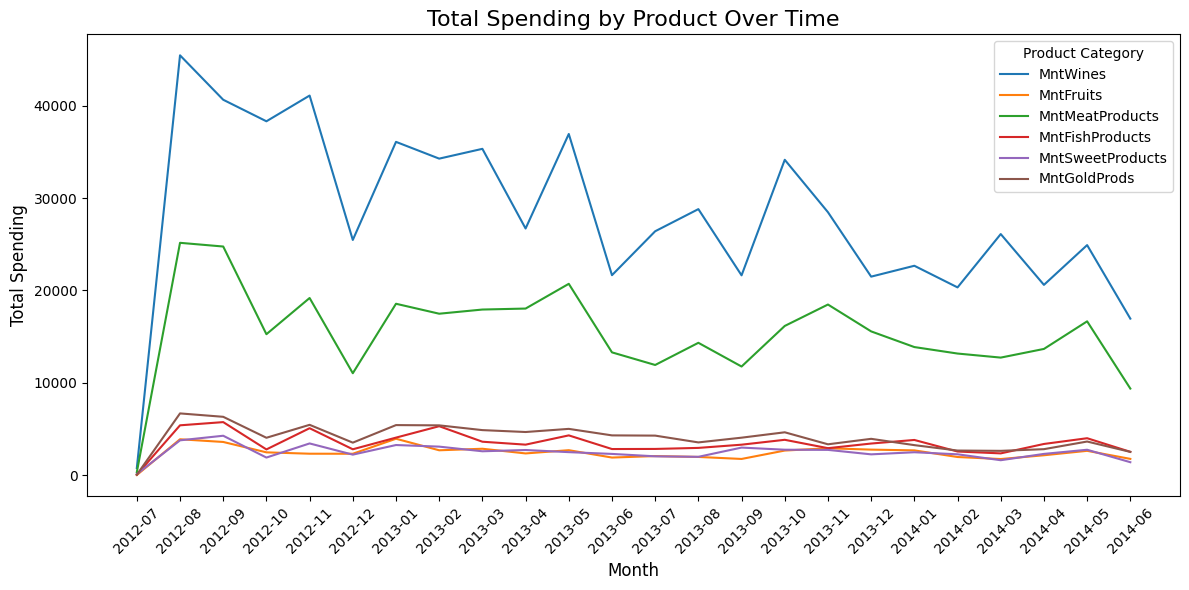

In [193]:
# Group by month and calculate the total spending for each product category
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
year_month_spending = df.groupby('YearMonth')[product_columns].sum()

# Plot lineplot for each product category
plt.figure(figsize=(12, 6))
for product in product_columns:
    plt.plot(year_month_spending.index.astype(str), year_month_spending[product], label=product)

# Customize plot
plt.title('Total Spending by Product Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.legend(title="Product Category", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

Insight:
- Kategori Wines merupakan kategori produk dengan total pengeluaran tertinggi. Artinya produk ini menjadi pilihan utama pelanggan. Kemungkinan besar adalah wines merupakan produk yang bersifat spesifik, sehingga harganya lebih tinggi dibanding yang lain
- Kategori Daging merupakan kategori tertinggi kedua setelah produk winess dengan tren yang cukup stabil.
- Ada beberapa penurunan dan kenaikan signifikan, terutama dalam kategori Wines dan Meats.
- Pengeluaran dalam titik puncak dapat terlihat dalam periode tertentu. Itu mungkin disebebabkan oleh musim liburan, promosi, budaya, atau perayaan Natal dan tahun baru
- Dapat terlihat bahwa setelah di titik puncak, pasti akan mengalami penurunan. Kemungkinan disebabkan oleh pelanggan yang mengurangi pembelian setelah membeli dengan jumlah yang sangat banyak di periode sebelumnya.

Penyebab Naik turunnya grafik:
- Pada periode seperti Desember dan awal Januari, pelanggan cenderung membeli lebih banyak produk seperti Wines, Meat Products, dan Sweets untuk perayaan atau konsumsi keluarga.
- Setelah itu, pengeluaran menurun karena pelanggan mungkin sedang mengatur ulang anggaran mereka setelah pengeluaran besar.
- kenaikan secara dadakan pada pengeluaran dapat disebabkan oleh promosi besar-besaran seperti diskon akhir tahun/Black Friday
- Produk seperti Fruits dan Fish mungkin terpengaruh oleh ketersediaan musiman, di mana pengeluaran lebih tinggi selama musim panen atau saat produk segar lebih banyak tersedia.
- Pelanggan mungkin mengalihkan pengeluaran mereka dari barang mewah seperti Gold Products ke barang kebutuhan pokok seperti Meat Products. Karena barang-barang mewah seperti ini rentan sekali terkena inflasi. Sehingga Daya beli untuk barang mewah menurun.

In [194]:
df.to_excel('supermarket_analysis.xlsx')

In [195]:
df.to_csv('supermarket_customers_clean.csv')

In [196]:
df['Churn'].value_counts()

Churn
0    1334
1     874
Name: count, dtype: int64

# **4. Conclusion and Recommendation**
## **4.1 Conclusion**
Dari analisis yang telah kita lakukan, dapat disimpulkan bahwa:
- Dari 2208 data yang kita miliki, terdapat 1334 customer yang masih ingin berbelanja di supermarket kedepannya, dan 874 customer yang berpotensi untuk tidak berbelanja di supermarket lagi.
- Kalau di breakdown lebih detail lagi, customer dengan kategori Gen X, Middle Income, Married, dan Graduation adalah kategori yang paling banyak customer yang tidak berbelanja lagi di supermarket.
- Dari hasil visualisasi hubungan antara kolom Income dan kolom Total_spending adalah positif, yang artinya semakin tinggi pendapatannya, maka semakin tinggi juga pengeluarannya
- Terdapat kondisi-kondisi spesifik yang dapat mempengaruhi total pengeluaran yang dilakukan oleh customer terhadap kategori tertentu, seperti kondisi budaya, musim liburan, perayaan, dan lain-lain.
- Dari total customer yang baru pertama kali belanja di supermarket setiap periode, trennya cukup stabil. Memang terdapat fluktuasi di beberapa periode.
- Kategori Silent Generation, High Income, Status pernikahan Others, dan High School merupakan kategori dengan proporsi total customer yang paling sedikit dibandingkan dengan kategori-kategori lainnya. 
- Rata-rata pengeluaran berdasarkan status pernikahan, Widow merupakan kategori dengan rata-rata pengeluaran yang paling tinggi dibandingkan dengan status pernikahan lainnya. Dan Others merupakan yang rata-rata pengeluarannya yang paling sedikit, walaupun tidak terpantau jauh.
- Jumlah penerimaan kampanye oleh customer, kampanye ke-2 memiliki total customer yang penerimaannya paling sedikit diantara kampanye sebelumnya, dan sesudahnya. Setelah kampanye ke-2, Kampanye ke 3 sampai 5 cenderung stabil, dan pada kampanye terakhir merupakan kampanye dengan total penerimaan terbanyak.

## **4.2 Recommendation**
Untuk customer dengan pendapatan tinggi:
- Tawarkan produk premium. Seperti Gourmet, produk impor, atau produk edisi terbatas
- Gunakan kemasan mewah untuk produk tertentu, seperti parsel makanan atau hampers hadiah. Agar value dari produk tersebut naik, sehingga customer dengan pendapatan tinggi tertarik untuk membelinya.
- Membership ekslusif: Buat program keanggotaan khusus, seperti VIP Members Club, yang memberikan akses ke diskon khusus, produk eksklusif, atau pengalaman unik (seperti wine tasting atau demo masak).
- Tawarkan produk yang sesuai dengan gaya hidup seperti paket kesehatan premium, atau paket gourmet.

Customer Lansia memang masih banyak yang bisa jalan, tetapi tidak sedikit juga customer lansia yang sudah tidak bisa berjalan secara normal, mereka sudah menggunakan kursi roda, atau tongkat. Untuk itu maka: 
- Tawarkan layanan antar belanja pengiriman barang belanjaan kerumah. Agar mempermudah customer yang lansia.
- Sediakan jalur kasir prioritas untuk pelanggan yang lansia agar mereka tidak perlu menunggu lama.
- Siapkan kereta belanja yang menggunakan bahan lebih ringan agar lebih mudah mendorongnya
- Peningkatan Aksesibilitas seperti menyediakan lahan parkir untuk kendaraan roda 4 khusus untuk disabilitas dekat dengan pintu masuk supermarket agar mereka ketika berjalan menuju pintu masuk supermarket tidak terlalu jauh, lalu tempat duduk di area tertenu, dan lift atau ramp yang ramah untuk customer yang disabilitas.
- Produk kesehatan. Seperti produk yang bebas gula, bebas gluten, susu dengan kandungan kalsium yang tinggi, vitamin, atau makanan yang baik untuk kesehatan jantung.

Strategi untuk meningkatkan loyalitas:
- Tambahkan reward points untuk setiap pembelian, yang nantinya bisa digunakan untuk penukaran dengan diskon, produk gratis, atau hadiah.
- Membuat tingkatan loyalitas seperti Silver, Gold, Platinum. Tingkatan loyalitas akan bertambah seiring customer membeli produk. Tingkatan loyalitas ini bisa memberikan keuntungan tambahan terhadap customer yang memiliki tingkatan lebih tinggi.
- Tanggapi keluhan secara cepat tanggap dan profesional.
- Berikan diskon atau promosi khusus kepada pelanggan setia sebagai bentuk penghargaan.

Cara untuk meningkatkan penjualan:
- Berikan diskon progresif berdasarkan total pembelian, seperti 5% untuk pembelian di atas $100 dan 10% untuk pembelian di atas $200.
- Promosikan paket musiman, seperti paket liburan atau perayaan.
- Gunakan data tren penjualan dari waktu ke waktu untuk mengidentifikasi periode dengan potensi penjualan tinggi. Dan perhatikan juga pola nya di bulan yang sama pada tahun yang berbeda. Contohnya melihat tren total pengeluaran pada produk Wines pada bulan Juni tahun 2013 dan 2014 menurun, maka solusinya adalah dengan mengurangi stock produk wines di tahun 2015 agar tidak mengalami kerugian yang besar. Sebaliknya, jika ada produk yang setiap tren mengalami kenaikan seperti produk daging di bulan september dan oktober pada tahun 2013, maka tingkatkan jumlah stocknya.
- Buat konten menarik di media sosial untuk mempromosikan produk-produk.